In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# 폰트 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic' # 폰트 변경
plt.rcParams['axes.unicode_minus'] = False # 축 값 마이너스 깨짐 해결

In [2]:
os.chdir("/Users/joekim/Downloads/data_038")

In [3]:
# 데이터 불러오기
data = pd.read_csv("data_038_1.csv")
explain = pd.read_excel("schema.xlsx")

In [4]:
data

,P1,P2,P3,P4,P5,P6,P7,B1,B2,B3,...,B165,B166,B167,C1,E1,E2,E3,E4,E5,E6
0,M,20대_후,1,1,0,0,A은행,0,0,0,...,0,0,4350000,210,0.000000e+00,0.000000e+00,1.111111e+10,0,1.111110e+11,1.100000e+09
1,M,50대_후,1,0,0,0,A은행,0,0,0,...,0,0,580000,40,0.000000e+00,0.000000e+00,0.000000e+00,0,1.111100e+11,1.000000e+10
2,M,40대_후,1,1,0,0,A은행,0,0,0,...,0,0,1950000,50,0.000000e+00,1.101101e+09,0.000000e+00,0,1.111010e+11,1.011010e+11
3,F,60대_초,1,1,0,0,A은행,0,0,0,...,0,0,43000000,50,0.000000e+00,0.000000e+00,0.000000e+00,0,1.111110e+11,1.111110e+11
4,M,30대_후,0,1,0,0,B은행,0,0,0,...,0,0,4910000,40,0.000000e+00,1.111110e+11,0.000000e+00,0,1.111110e+11,1.111110e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473223,F,40대_초,0,1,0,1,B은행,0,0,0,...,0,0,650000,30,1.111110e+11,1.000100e+10,0.000000e+00,0,1.111110e+11,1.011111e+10
473224,M,20대_후,1,1,0,0,A은행,0,0,0,...,0,0,4790000,50,0.000000e+00,1.101100e+11,0.000000e+00,0,1.111110e+11,1.111110e+11
473225,F,40대_후,1,1,1,0,B은행,0,0,0,...,0,0,1650000,60,0.000000e+00,1.001000e+08,0.000000e+00,0,1.111110e+11,1.111110e+11
473226,M,60대_후,1,1,1,0,A은행,0,0,0,...,0,0,1340000,50,0.000000e+00,1.001010e+08,0.000000e+00,0,1.111110e+11,1.101010e+11


In [129]:
all_sum = data.sum()[7:-8]
xticks = all_sum.index
all_sum_data = pd.DataFrame({"index" : xticks, "value" : all_sum}).reset_index(drop=True)

In [195]:
# top10 뽑아내기 코드
top10 = list(all_sum_data.sort_values(by="value", ascending = False).iloc[:,0][0:10])
all_sum_data['color'] = "blue"
for i in top10:
    num = int(i.split("B")[1])
    if i in list(all_sum_data['index']):
        all_sum_data['color'][num-1] = "red"

In [199]:
top10

['B34', 'B12', 'B33', 'B161', 'B15', 'B35', 'B149', 'B41', 'B61', 'B107']

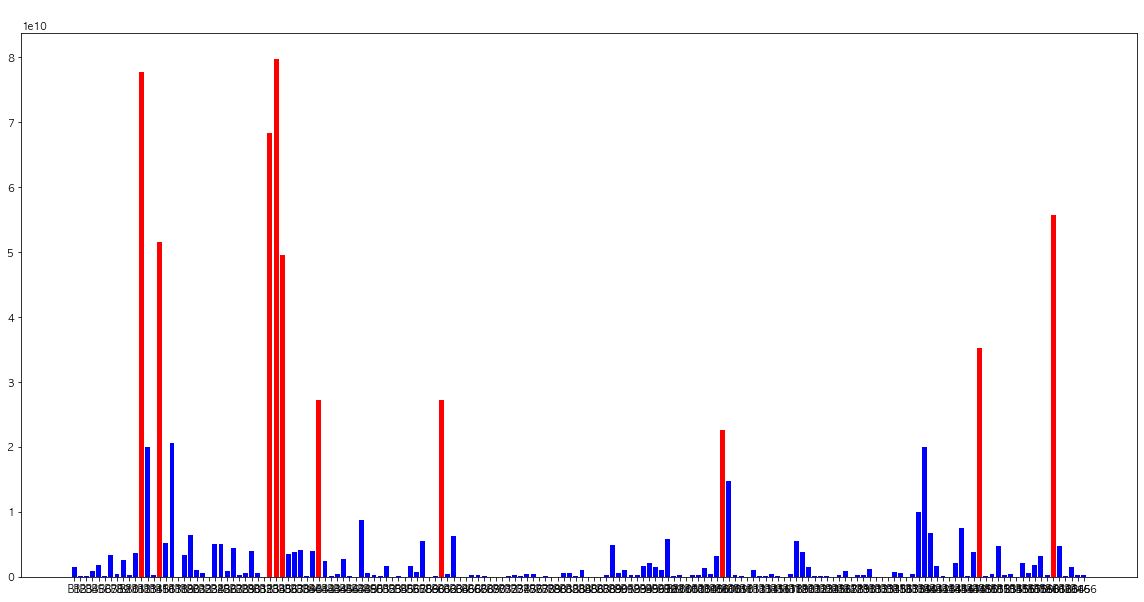

In [255]:
plt.figure(figsize=(20, 10))
plt.bar(list(all_sum_data['index']), list(all_sum_data['value']), color = list(all_sum_data['color']))
plt.title("사람들의 각 분야별 이용금액 합 그래프", color = "w",size=25)
plt.show()

<AxesSubplot:xlabel='index', ylabel='value'>

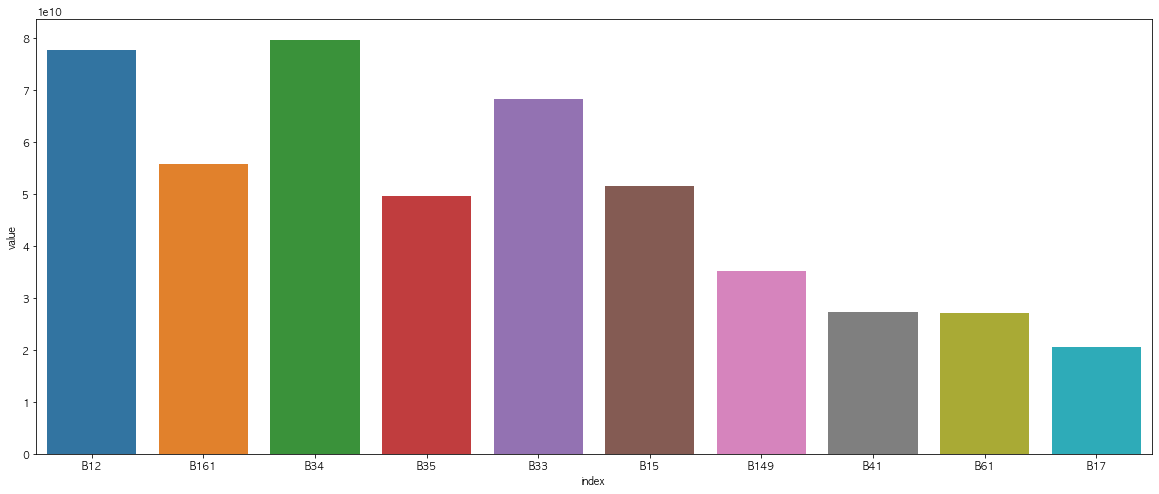

In [287]:
# 전체 각 분야별 금액합 top10 그래프
plt.figure(figsize = (20,8))
all_sum_data.index = all_sum_data['index']
top10data = all_sum_data.loc[top10,:]
sns.barplot(data = top10data, x = "index", y="value")

# 성별, 연령별 구매현황 시각화해보기

In [243]:
# 성별에 따라 분류
male = data[data['P1'] == "M"].iloc[:,7:-8]
female = data[data['P1'] == "F"].iloc[:,7:-8]

In [246]:
# 남성
# 남성 많이 이용한 금액 순
male.sum().sort_values(ascending = False)[0:5]
# 남자 많이 이용한 횟수 순
male.astype(bool).sum(axis=0).sort_values(ascending = False)[0:5]

# 여성
# 여성 많이 이용한 금액 순
female.sum().sort_values(ascending = False)[0:5]
# 여자 많이 이용한 횟수 순
female.astype(bool).sum(axis=0).sort_values(ascending = False)[0:5]

In [275]:
# 남녀 분야별 금액합
male_money_sum = male.sum()
female_money_sum = female.sum()

# 남녀 분야별 구매횟수합
male_money_count = male.astype(bool).sum(axis=0)
female_money_count = female.astype(bool).sum(axis=0)

# 구매분야
xticks = male.columns

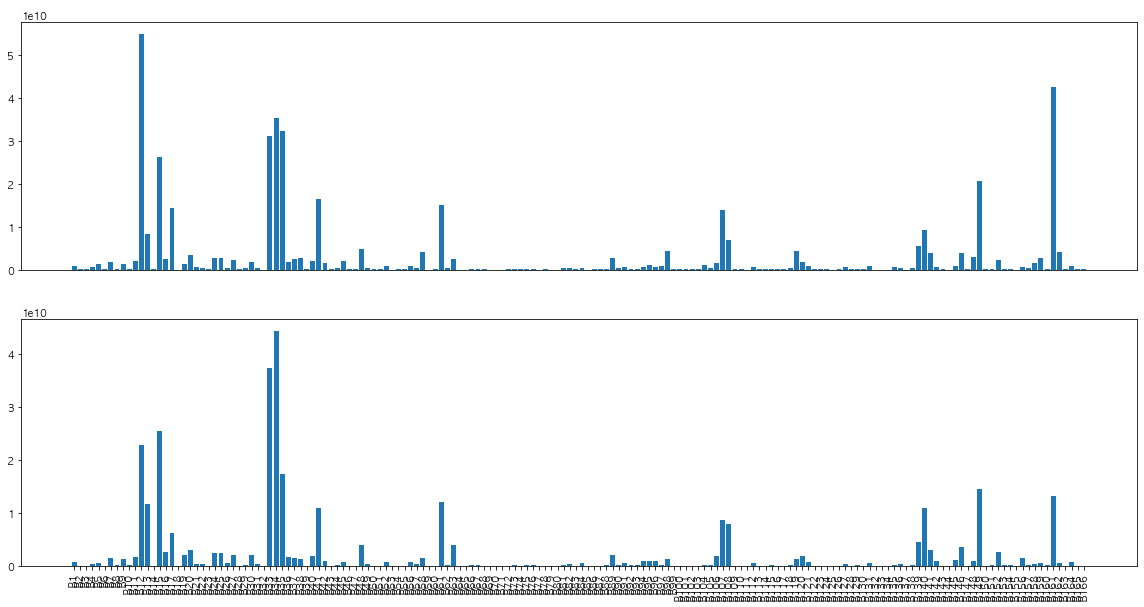

In [280]:
# 남녀 각 분야별 금액합 그래프
plt.figure(figsize=(20, 10))

# 남자 그래프
plt.subplot(2,1,1)
plt.bar(xticks, male_money_sum)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.title("male/female sum graph", color = "w")

# 여자 그래프
plt.subplot(2,1,2)
plt.bar(xticks, female_money_sum)
plt.xticks(rotation=90)

plt.show()

In [293]:
# top10 뽑아내기 코드(남자)
male_sum = pd.DataFrame({"index": xticks, "value":male_money_sum})
top10_male = list(male_sum.sort_values(by="value", ascending = False).iloc[:,0][0:10])
male_sum['color'] = "blue"
for i in top10_male:
    num = int(i.split("B")[1])
    if i in list(male_sum['index']):
        male_sum['color'][num-1] = "red"
        
# top10 뽑아내기 코드(여자)
female_sum = pd.DataFrame({"index": xticks, "value":female_money_sum})
top10_female = list(female_sum.sort_values(by="value", ascending = False).iloc[:,0][0:10])
female_sum['color'] = "blue"
for i in top10_female:
    num = int(i.split("B")[1])
    if i in list(female_sum['index']):
        female_sum['color'][num-1] = "red"

/var/folders/0h/_g51sr8s3gq02p42lq6qmplw0000gn/T/ipykernel_16612/601992172.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_sum['color'][num-1] = "red"
/var/folders/0h/_g51sr8s3gq02p42lq6qmplw0000gn/T/ipykernel_16612/601992172.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_sum['color'][num-1] = "red"


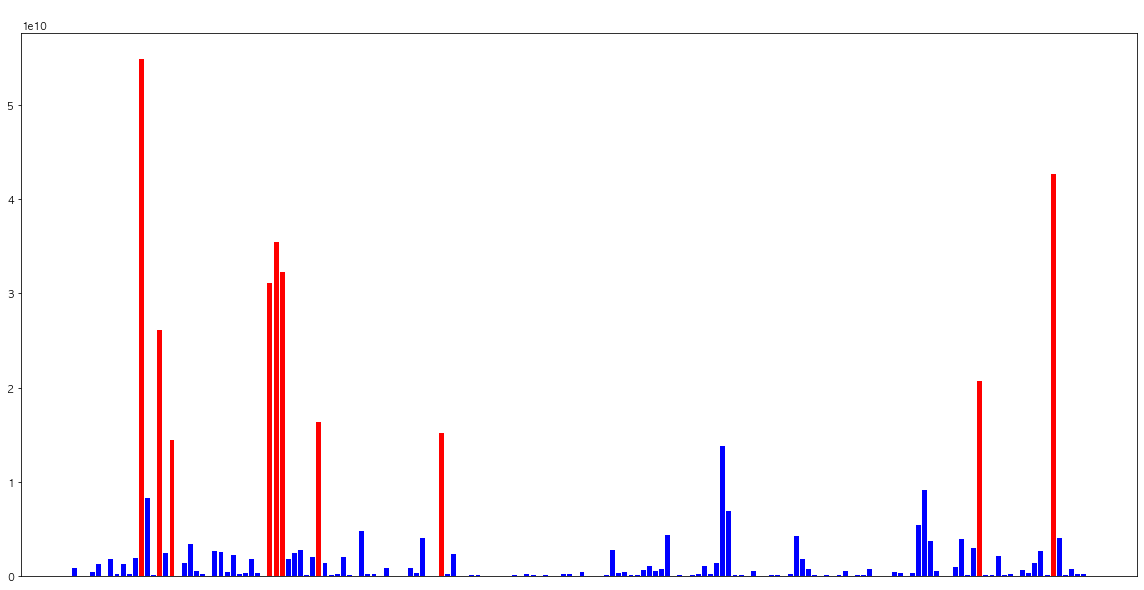

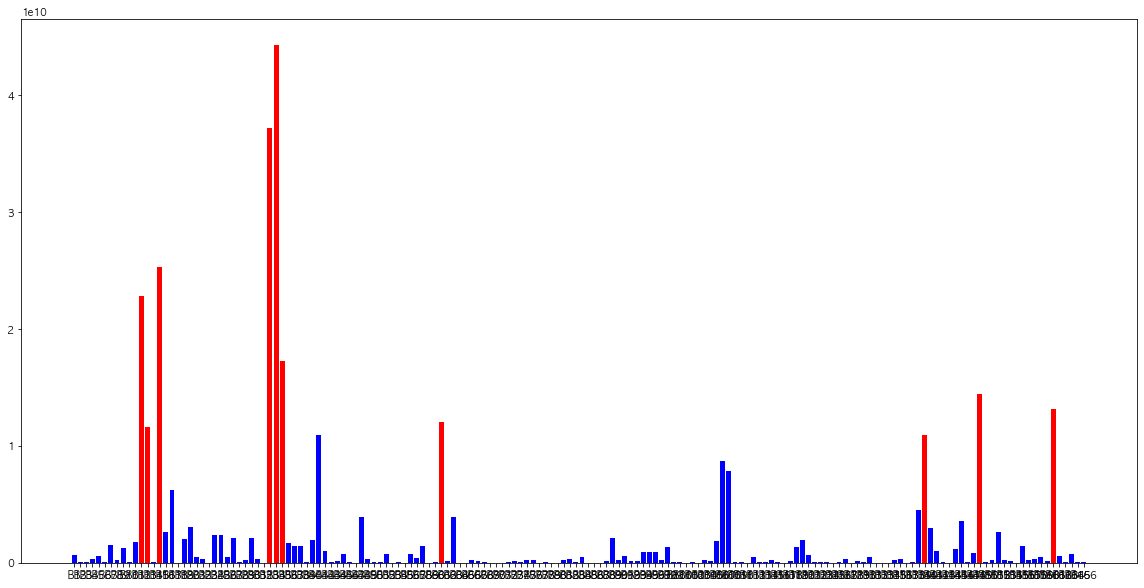

In [304]:
# 남자 그래프
plt.figure(figsize=(20, 10))
plt.bar(male_sum['index'], male_sum['value'], color = male_sum['color'])
plt.title("남녀 각 분야별 이용금액 합 그래프", color = "w",size=25)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.show()

# 여자 그래프
plt.figure(figsize=(20, 10))
plt.bar(female_sum['index'], female_sum['value'], color = female_sum['color'])
plt.show()

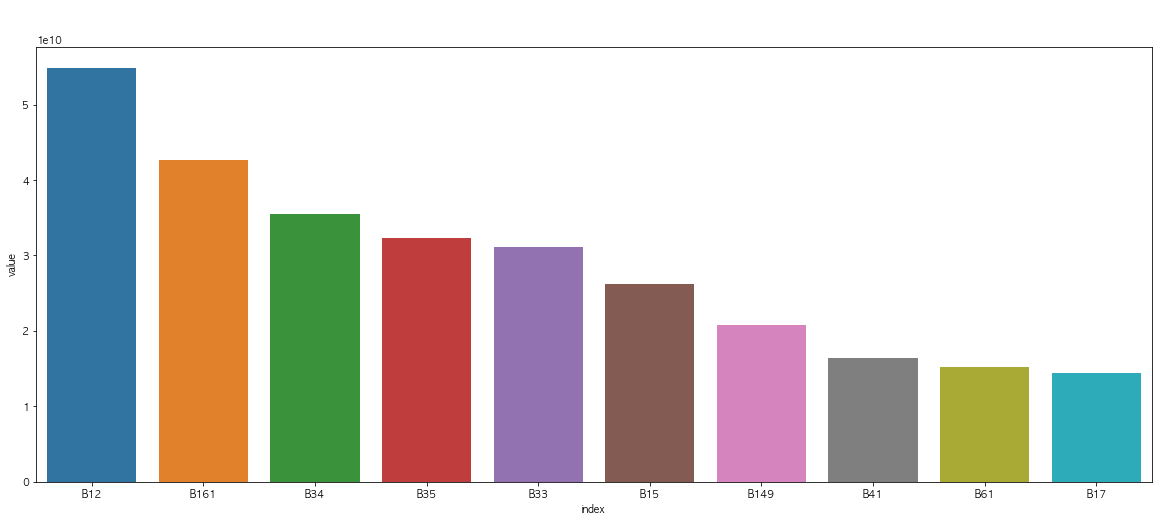

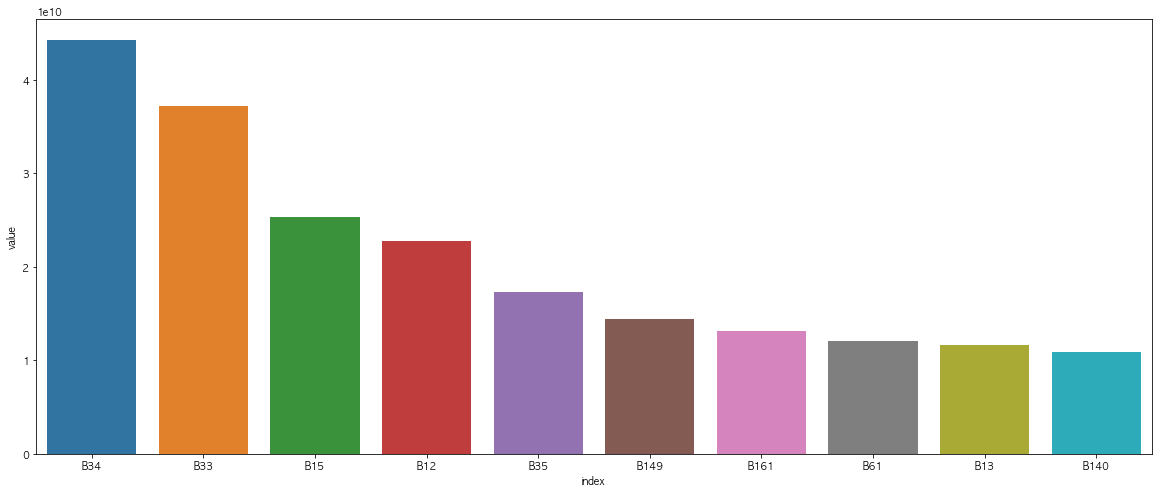

In [302]:
# 남자 top10 시각화
plt.figure(figsize = (20,8))
male_sum.index = male_sum['index']
top10maledata = male_sum.loc[top10_male,:]
sns.barplot(data = top10maledata, x = "index", y="value")
plt.title("남녀 각 분야별 금액합 top10 그래프", color = "w", size = 40)


# 여자 top10 시각화
plt.figure(figsize = (20,8))
female_sum.index = female_sum['index']
top10femaledata = female_sum.loc[top10_female,:]
sns.barplot(data = top10femaledata, x = "index", y="value")

plt.show()

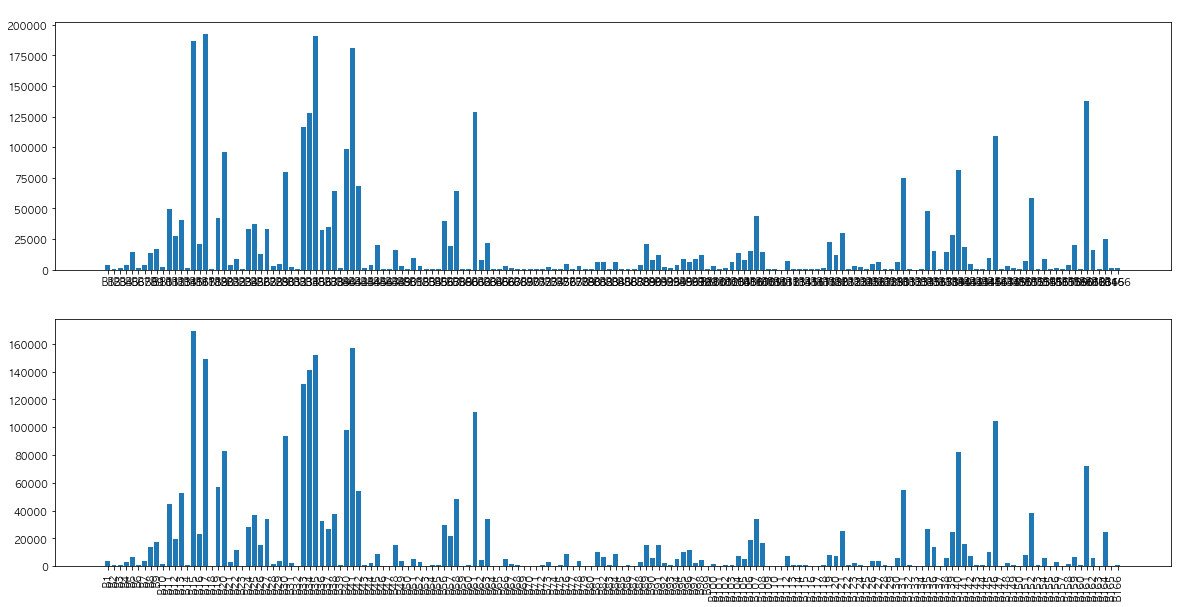

In [305]:
# 남녀 각 분야별 구매횟수합 그래프
plt.figure(figsize=(20, 10))

# 남자 그래프
plt.subplot(2,1,1)
plt.bar(xticks, male_money_count)
plt.title("male sum graph", color = "w")

# 여자 그래프
plt.subplot(2,1,2)
plt.bar(xticks, female_money_count)
plt.title("female sum graph", color = "w")
plt.xticks(rotation=90)

plt.show()

In [323]:
## 연령별 이용 금액
male = data.iloc[:,1:]
female = data.iloc[:,1:]
# 남자 데이터(맨뒤 세자리 숫자 : 나이+초/후)
male201 = male[male["P2"] == "20대_초"].drop(["P2"],axis = 1).iloc[:,5:-8]
male202 = male[male["P2"] == "20대_후"].drop(["P2"],axis = 1).iloc[:,5:-8]
male301 = male[male["P2"] == "30대_초"].drop(["P2"],axis = 1).iloc[:,5:-8]
male302 = male[male["P2"] == "30대_후"].drop(["P2"],axis = 1).iloc[:,5:-8]
male401 = male[male["P2"] == "40대_초"].drop(["P2"],axis = 1).iloc[:,5:-8]
male402 = male[male["P2"] == "40대_후"].drop(["P2"],axis = 1).iloc[:,5:-8]
male501 = male[male["P2"] == "50대_초"].drop(["P2"],axis = 1).iloc[:,5:-8]
male502 = male[male["P2"] == "50대_후"].drop(["P2"],axis = 1).iloc[:,5:-8]
male601 = male[male["P2"] == "60대_초"].drop(["P2"],axis = 1).iloc[:,5:-8]
male602 = male[male["P2"] == "60대_후"].drop(["P2"],axis = 1).iloc[:,5:-8]

# 남자 연령별 각 분야 구매금액 합
male_money_201 = male201.sum()
male_money_202 = male202.sum()
male_money_301 = male301.sum()
male_money_302 = male302.sum()
male_money_401 = male401.sum()
male_money_402 = male402.sum()
male_money_501 = male501.sum()
male_money_502 = male502.sum()
male_money_601 = male601.sum()
male_money_602 = male602.sum()

# 남자 연령별 각 분야 구매횟수 합
male_count_201 = male201.astype(bool).sum(axis=0)
male_count_202 = male202.astype(bool).sum(axis=0)
male_count_301 = male301.astype(bool).sum(axis=0)
male_count_302 = male302.astype(bool).sum(axis=0)
male_count_401 = male401.astype(bool).sum(axis=0)
male_count_402 = male402.astype(bool).sum(axis=0)
male_count_501 = male501.astype(bool).sum(axis=0)
male_count_502 = male502.astype(bool).sum(axis=0)
male_count_601 = male601.astype(bool).sum(axis=0)
male_count_602 = male602.astype(bool).sum(axis=0)


# 여자 데이터(맨뒤 세자리 숫자 : 나이+초/후)
female201 = female[female["P2"] == "20대_초"].drop(["P2"],axis = 1).iloc[:,5:-8]
female202 = female[female["P2"] == "20대_후"].drop(["P2"],axis = 1).iloc[:,5:-8]
female301 = female[female["P2"] == "30대_초"].drop(["P2"],axis = 1).iloc[:,5:-8]
female302 = female[female["P2"] == "30대_후"].drop(["P2"],axis = 1).iloc[:,5:-8]
female401 = female[female["P2"] == "40대_초"].drop(["P2"],axis = 1).iloc[:,5:-8]
female402 = female[female["P2"] == "40대_후"].drop(["P2"],axis = 1).iloc[:,5:-8]
female501 = female[female["P2"] == "50대_초"].drop(["P2"],axis = 1).iloc[:,5:-8]
female502 = female[female["P2"] == "50대_후"].drop(["P2"],axis = 1).iloc[:,5:-8]
female601 = female[female["P2"] == "60대_초"].drop(["P2"],axis = 1).iloc[:,5:-8]
female602 = female[female["P2"] == "60대_후"].drop(["P2"],axis = 1).iloc[:,5:-8]

# 여자 연령별 각 분야 구매금액 합
female_money_201 = female201.sum()
female_money_202 = female202.sum()
female_money_301 = female301.sum()
female_money_302 = female302.sum()
female_money_401 = female401.sum()
female_money_402 = female402.sum()
female_money_501 = female501.sum()
female_money_502 = female502.sum()
female_money_601 = female601.sum()
female_money_602 = female602.sum()

# 여자 연령별 각 분야 구매횟수 합
female_count_201 =female201.astype(bool).sum(axis=0)
female_count_202 =female202.astype(bool).sum(axis=0)
female_count_301 =female301.astype(bool).sum(axis=0)
female_count_302 =female302.astype(bool).sum(axis=0)
female_count_401 =female401.astype(bool).sum(axis=0)
female_count_402 =female402.astype(bool).sum(axis=0)
female_count_501 =female501.astype(bool).sum(axis=0)
female_count_502 =female502.astype(bool).sum(axis=0)
female_count_601 =female601.astype(bool).sum(axis=0)
female_count_602 =female602.astype(bool).sum(axis=0)

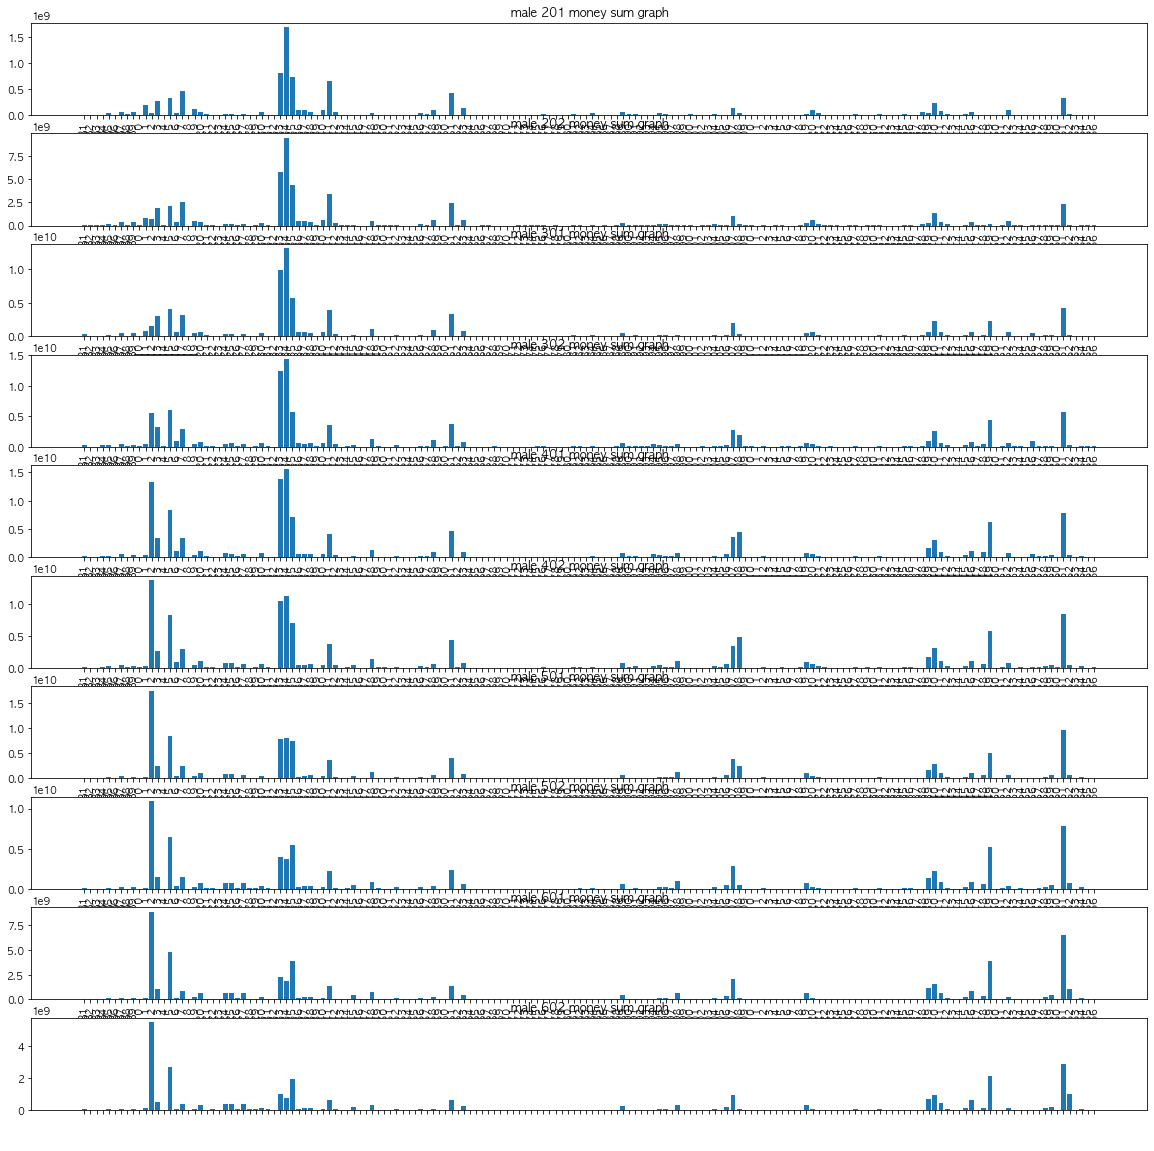

In [324]:
# 남성의 연령별 분야별 구매 합 그래프
plt.figure(figsize=(20,20))

plt.subplot(10,1,1)
plt.bar(xticks, male_money_201)
plt.title("male 201 money sum graph")
plt.xticks(rotation=90)

plt.subplot(10,1,2)
plt.bar(xticks, male_money_202)
plt.title("male 202 money sum graph")
plt.xticks(rotation=90)

plt.subplot(10,1,3)
plt.bar(xticks, male_money_301)
plt.title("male 301 money sum graph")
plt.xticks(rotation=90)

plt.subplot(10,1,4)
plt.bar(xticks, male_money_302)
plt.title("male 302 money sum graph")
plt.xticks(rotation=90)

plt.subplot(10,1,5)
plt.bar(xticks, male_money_401)
plt.title("male 401 money sum graph")
plt.xticks(rotation=90)

plt.subplot(10,1,6)
plt.bar(xticks, male_money_402)
plt.title("male 402 money sum graph")
plt.xticks(rotation=90)

plt.subplot(10,1,7)
plt.bar(xticks, male_money_501)
plt.title("male 501 money sum graph")
plt.xticks(rotation=90)

plt.subplot(10,1,8)
plt.bar(xticks, male_money_502)
plt.title("male 502 money sum graph")
plt.xticks(rotation=90)

plt.subplot(10,1,9)
plt.bar(xticks, male_money_601)
plt.title("male 601 money sum graph")
plt.xticks(rotation=90)

plt.subplot(10,1,10)
plt.bar(xticks, male_money_602)
plt.title("male 602 money sum graph")
plt.xticks(rotation=90, color = 'w')

plt.show()

In [ ]:
# 남성의 연령별 분야별 구매횟수 합 그래프
plt.figure(figsize=(20,20))

plt.subplot(10,1,1)
plt.bar(xticks, male_count_201)
plt.title("male 201 money count graph")
plt.xticks(rotation=90)

plt.subplot(10,1,2)
plt.bar(xticks, male_count_202)
plt.title("male 202 money count graph")
plt.xticks(rotation=90)

plt.subplot(10,1,3)
plt.bar(xticks, male_count_301)
plt.title("male 301 money count graph")
plt.xticks(rotation=90)

plt.subplot(10,1,4)
plt.bar(xticks, male_count_302)
plt.title("male 302 money count graph")
plt.xticks(rotation=90)

plt.subplot(10,1,5)
plt.bar(xticks, male_count_401)
plt.title("male 401 money count graph")
plt.xticks(rotation=90)

plt.subplot(10,1,6)
plt.bar(xticks, male_count_402)
plt.title("male 402 money count graph")
plt.xticks(rotation=90)

plt.subplot(10,1,7)
plt.bar(xticks, male_count_501)
plt.title("male 501 money count graph")
plt.xticks(rotation=90)

plt.subplot(10,1,8)
plt.bar(xticks, male_count_502)
plt.title("male 502 money count graph")
plt.xticks(rotation=90)

plt.subplot(10,1,9)
plt.bar(xticks, male_count_601)
plt.title("male 601 money count graph")
plt.xticks(rotation=90)

plt.subplot(10,1,10)
plt.bar(xticks, male_count_602)
plt.title("male 602 money count graph")
plt.xticks(rotation=90)

plt.show()

In [ ]:
# 여성의 연령별 분야별 구매 합 그래프
plt.figure(figsize=(20,20))

plt.subplot(10,1,1)
plt.bar(xticks, female_money_201)
plt.title("female 201 money sum graph")
plt.xticks(rotation=90)

plt.subplot(10,1,2)
plt.bar(xticks, female_money_202)
plt.title("female 202 money sum graph")
plt.xticks(rotation=90)

plt.subplot(10,1,3)
plt.bar(xticks, female_money_301)
plt.title("female 301 money sum graph")
plt.xticks(rotation=90)

plt.subplot(10,1,4)
plt.bar(xticks, female_money_302)
plt.title("female 302 money sum graph")
plt.xticks(rotation=90)

plt.subplot(10,1,5)
plt.bar(xticks, female_money_401)
plt.title("female 401 money sum graph")
plt.xticks(rotation=90)

plt.subplot(10,1,6)
plt.bar(xticks, female_money_402)
plt.title("female 402 money sum graph")
plt.xticks(rotation=90)

plt.subplot(10,1,7)
plt.bar(xticks, female_money_501)
plt.title("female 501 money sum graph")
plt.xticks(rotation=90)

plt.subplot(10,1,8)
plt.bar(xticks, female_money_502)
plt.title("female 502 money sum graph")
plt.xticks(rotation=90)

plt.subplot(10,1,9)
plt.bar(xticks, female_money_601)
plt.title("female 601 money sum graph")
plt.xticks(rotation=90)

plt.subplot(10,1,10)
plt.bar(xticks, female_money_602)
plt.title("female 602 money sum graph")
plt.xticks(rotation=90)

plt.show()

In [ ]:
# 여성의 연령별 분야별 구매횟수 합 그래프
plt.figure(figsize=(20,20))

plt.subplot(10,1,1)
plt.bar(xticks, female_count_201)
plt.title("female 201 money count graph")
plt.xticks(rotation=90)

plt.subplot(10,1,2)
plt.bar(xticks, female_count_202)
plt.title("female 202 money count graph")
plt.xticks(rotation=90)

plt.subplot(10,1,3)
plt.bar(xticks, female_count_301)
plt.title("female 301 money count graph")
plt.xticks(rotation=90)

plt.subplot(10,1,4)
plt.bar(xticks, female_count_302)
plt.title("female 302 money count graph")
plt.xticks(rotation=90)

plt.subplot(10,1,5)
plt.bar(xticks, female_count_401)
plt.title("female 401 money count graph")
plt.xticks(rotation=90)

plt.subplot(10,1,6)
plt.bar(xticks, female_count_402)
plt.title("female 402 money count graph")
plt.xticks(rotation=90)

plt.subplot(10,1,7)
plt.bar(xticks, female_count_501)
plt.title("female 501 money count graph")
plt.xticks(rotation=90)

plt.subplot(10,1,8)
plt.bar(xticks, female_count_502)
plt.title("female 502 money count graph")
plt.xticks(rotation=90)

plt.subplot(10,1,9)
plt.bar(xticks, female_count_601)
plt.title("female 601 money count graph")
plt.xticks(rotation=90)

plt.subplot(10,1,10)
plt.bar(xticks, female_count_602)
plt.title("female 602 money count graph")
plt.xticks(rotation=90)

plt.show()

In [ ]:
# 연령별 이용금액합 데이터
age201 = data2[data2["P2"] == "20대_초"]
age202 = data2[data2['P2'] == "20대_후"]
age301 = data2[data2["P2"] == "30대_초"]
age302 = data2[data2['P2'] == "30대_후"]
age401 = data2[data2["P2"] == "40대_초"]
age402 = data2[data2['P2'] == "40대_후"]
age501 = data2[data2["P2"] == "50대_초"]
age502 = data2[data2['P2'] == "50대_후"]
age601 = data2[data2["P2"] == "60대_초"]
age602 = data2[data2['P2'] == "60대_후"]

age201_sum = age201.sum()[7:-8]
age202_sum = age202.sum()[7:-8]
age301_sum = age301.sum()[7:-8]
age302_sum = age302.sum()[7:-8]
age401_sum = age401.sum()[7:-8]
age402_sum = age402.sum()[7:-8]
age501_sum = age501.sum()[7:-8]
age502_sum = age502.sum()[7:-8]
age601_sum = age601.sum()[7:-8]
age602_sum = age602.sum()[7:-8]

In [ ]:
# 연령별 분야별 이용금액 합 그래프
plt.figure(figsize=(20,20))
plt.title("money sum graph by age")

plt.subplot(10,1,1)
plt.bar(xticks, age201_sum)
plt.xticks(rotation=90)

plt.subplot(10,1,2)
plt.bar(xticks, age202_sum)
plt.xticks(rotation=90)

plt.subplot(10,1,3)
plt.bar(xticks, age301_sum)
plt.xticks(rotation=90)

plt.subplot(10,1,4)
plt.bar(xticks, age302_sum)
plt.xticks(rotation=90)

plt.subplot(10,1,5)
plt.bar(xticks, age401_sum)
plt.xticks(rotation=90)

plt.subplot(10,1,6)
plt.bar(xticks, age402_sum)
plt.xticks(rotation=90)

plt.subplot(10,1,7)
plt.bar(xticks, age501_sum)
plt.xticks(rotation=90)

plt.subplot(10,1,8)
plt.bar(xticks, age502_sum)
plt.xticks(rotation=90)

plt.subplot(10,1,9)
plt.bar(xticks, age601_sum)
plt.xticks(rotation=90)

plt.subplot(10,1,10)
plt.bar(xticks, age602_sum)
plt.xticks(rotation=90)

plt.show()

# 신한은행고객 여부에 따른 데이터시각화

In [ ]:
data2 = data.iloc[:,2:-8]
sinhan = data2[data2['P3'] == 1].drop("P3", axis = 1)
nosinhan = data2[data2['P3'] == 0].drop("P3", axis = 1)

In [ ]:
sinhan_money_sum = sinhan.sum()
nosinhan_money_sum = nosinhan.sum()
sinhan_count_sum = sinhan.astype(bool).sum(axis=0)
nosinhan_count_sum = nosinhan.astype(bool).sum(axis=0)

In [ ]:
# 신한은행 고객 분야별 금액합 그래프
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.bar(xticks, sinhan_money_sum)
plt.title("sinhan sum graph", color = "w")

# 신한은행 아닌 고객 분야별 금액합 그래프
plt.subplot(2,1,2)
plt.bar(xticks, nosinhan_money_sum)
plt.title("notsinhan sum graph", color = "w")
plt.xticks(rotation=90)

plt.show()

In [ ]:
# 신한은행 고객 분야별 구매횟수 그래프
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.bar(xticks, sinhan_count_sum)
plt.title("sinhan count graph", color = "w")

# 신한은행 아닌 고객 분야별 구매횟수 그래프
plt.subplot(2,1,2)
plt.bar(xticks, nosinhan_count_sum)
plt.title("notsinhan count graph", color = "w")
plt.xticks(rotation=90)

plt.show()

# 갖가지 전처리

In [ ]:
data2 = data.copy()

In [ ]:
# 신한은행 고객 & 다른 은행 계좌 연결
diff = (data2.P3 == 1) & (data2.P7 == "B은행")
diffbank = data2[diff]

# 신한은행 고객 & 다른 증권사 계좌 연결
diff2 = (data2.P3 == 1) & (data2.P7 == "B증권사")
diffstock = data2[diff2]

# 신한 은행 & 증권사 총합
print(len(diffbank) + len(diffstock))

In [ ]:
# 신한은행 비고객 & 신한 은행 계좌 연결
diff = (data2.P3 == 0) & (data2.P7 == "A은행")
diffbank = data2[diff]

# 신한은행 비고객 & 신한 증권사 계좌 연결
diff2 = (data2.P3 == 0) & (data2.P7 == "A증권사")
diffstock = data2[diff2]

# 다른 은행 & 신한증권사 총합
print(len(diffbank) + len(diffstock))

In [ ]:
# 이용횟수와 사용금액 합간의 상관관계

# 합을 B167을 사용
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
plt.scatter(data2.C1, data2.B167)

# 합을 B1~B166까지 사용
plt.subplot(2,1,2)
sumdata = data2.iloc[:,7:-8].sum(axis = 1)
plt.scatter(data2.C1, sumdata)

plt.show()

In [353]:
print(len(male201)+len(female201), len(male202)+len(female202),
      len(male301)+len(female301),len(male302)+len(female302),
      len(male401)+len(female401),len(male402)+len(female402),
      len(male501)+len(female501),len(male502)+len(female502),
     len(male601)+len(female601), len(male602)+len(female602))

15568 81232 111778 120018 142144 134518 132842 94274 72542 41540


# 분류 데이터분석

In [18]:
temp_dat = data.copy()

temp_dat['숙박'] = 0
temp_dat['식료품'] = 0
temp_dat['의류및신발'] = 0
temp_dat['농업']=0
temp_dat['요금'] = 0
temp_dat['가정용품및가사서비스'] = 0
temp_dat['보건'] =0
temp_dat['교통'] =0
temp_dat['통신'] =0
temp_dat['오락및문화'] =0
temp_dat['교육'] =0
temp_dat['기타'] =0
temp_dat['쇼핑몰기타'] =0
temp_dat['사치품'] =0
temp_dat['전자기기'] = 0
temp_dat['장비 및 화물운송'] = 0
temp_dat['생활서비스'] = 0
temp_dat['전문서비스'] = 0
temp_dat['제조업']=0
temp_dat['교통수단_관리'] = 0



for i in range(1, 167):
    if (i >= 1 and i <= 5):
        temp_dat['숙박'] += temp_dat[f"B{i}"]
    elif(i == 15 or i == 17 or i == 20 or (i<= 27 and i >= 22) or (i<= 31 and i >= 29) or (i<= 42 and i >= 35) ):
        temp_dat['식료품'] += temp_dat[f"B{i}"]
    elif ((i <= 66 and i >= 63) or (i <= 71 and i >= 68)):
        temp_dat['의류및신발'] += temp_dat[f"B{i}"]
    elif (i == 157  or (i <= 78 and i >= 72)):
        temp_dat['사치품'] += temp_dat[f"B{i}"]
    elif(i == 28):
        temp_dat['농업'] += temp_dat[f"B{i}"]
    elif((i<= 14 and i >= 13) or i == 16 or (i<= 19 and i >= 18) or i == 21  ):
        temp_dat['쇼핑몰기타'] += temp_dat[f"B{i}"]
    elif(i == 12 or (i<= 164 and i >= 161) ):
        temp_dat['요금'] += temp_dat[f"B{i}"]
    elif(i == 34 or (i<= 60 and i >= 43) or i == 67 or i == 93 or (i<= 112 and i >= 109) or (i<= 117 and i >= 114)  ):
        temp_dat['가정용품및가사서비스'] += temp_dat[f"B{i}"]
    elif((i<= 107 and i >= 106) or (i<= 149 and i >= 139) ):
        temp_dat['보건'] += temp_dat[f"B{i}"]
    elif((i <= 11 and i >= 7) or i == 118):
        temp_dat['교통'] += temp_dat[f"B{i}"]
    elif(i <= 62 and i >= 61):
        temp_dat['통신'] += temp_dat[f"B{i}"]
    elif(i == 6 or (i <= 90 and i >= 79) or (i <= 105 and i >= 97) or (i <= 121 and i >= 120) or i== 123 or i ==134 or (i <= 138 and i >= 137) ):
        temp_dat['오락및문화'] += temp_dat[f"B{i}"]
    elif((i <= 92 and i >= 91) or i == 94 or i == 108 or i == 122 or (i <= 156 and i >= 155) or i == 160):
        temp_dat['교육'] += temp_dat[f"B{i}"]
    elif(i == 33):
        temp_dat['전자기기'] += temp_dat[f"B{i}"]
    elif(i >= 124 and i <= 126):
        temp_dat['장비 및 화물운송'] += temp_dat[f"B{i}"]
    elif((i >= 127 and i <= 128) or (i == 133) or (i >= 135 and i <= 136)):
        temp_dat['생활서비스'] += temp_dat[f"B{i}"]
    elif(i >= 128 and i <= 132):
        temp_dat['전문서비스'] += temp_dat[f"B{i}"]
    elif(i >= 150 and i <= 151):
        temp_dat['제조업'] += temp_dat[f"B{i}"]
    elif((i == 119) or (i >= 158 and i <= 159) or (i >= 165 and i <= 166)):
        temp_dat['교통수단_관리'] += temp_dat[f"B{i}"]
    else:
        temp_dat['기타'] += temp_dat[f"B{i}"]

In [19]:
temp_dat

,P1,P2,P3,P4,P5,P6,P7,B1,B2,B3,...,교육,기타,쇼핑몰기타,사치품,전자기기,장비 및 화물운송,생활서비스,전문서비스,제조업,교통수단_관리
0,M,20대_후,1,1,0,0,A은행,0,0,0,...,0,60000,102000,0,135000,0,0,0,0,0
1,M,50대_후,1,0,0,0,A은행,0,0,0,...,0,0,0,0,146000,0,0,1000,0,0
2,M,40대_후,1,1,0,0,A은행,0,0,0,...,523000,0,0,0,0,0,9000,0,0,0
3,F,60대_초,1,1,0,0,A은행,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,30대_후,0,1,0,0,B은행,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473223,F,40대_초,0,1,0,1,B은행,0,0,0,...,0,0,0,0,314000,0,0,0,0,0
473224,M,20대_후,1,1,0,0,A은행,0,0,0,...,0,117000,48000,0,0,0,0,0,0,0
473225,F,40대_후,1,1,1,0,B은행,0,0,0,...,6000,0,1000,0,139000,0,0,1000,0,0
473226,M,60대_후,1,1,1,0,A은행,0,0,0,...,0,0,36000,0,484000,0,0,0,0,0


In [28]:
# 은행 결제계좌 고객 데이터 분류
temp_dat2 = temp_dat.copy()
Abank = temp_dat.loc[temp_dat["P7"] == "A은행"]
Bbank = temp_dat.loc[temp_dat["P7"] == "B은행"]
bank = temp_dat.loc[(temp_dat['P7'] == "A은행") | (temp_dat['P7'] == "B은행")]

In [29]:
bank

,P1,P2,P3,P4,P5,P6,P7,B1,B2,B3,...,교육,기타,쇼핑몰기타,사치품,전자기기,장비 및 화물운송,생활서비스,전문서비스,제조업,교통수단_관리
0,M,20대_후,1,1,0,0,A은행,0,0,0,...,0,60000,102000,0,135000,0,0,0,0,0
1,M,50대_후,1,0,0,0,A은행,0,0,0,...,0,0,0,0,146000,0,0,1000,0,0
2,M,40대_후,1,1,0,0,A은행,0,0,0,...,523000,0,0,0,0,0,9000,0,0,0
3,F,60대_초,1,1,0,0,A은행,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,30대_후,0,1,0,0,B은행,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473223,F,40대_초,0,1,0,1,B은행,0,0,0,...,0,0,0,0,314000,0,0,0,0,0
473224,M,20대_후,1,1,0,0,A은행,0,0,0,...,0,117000,48000,0,0,0,0,0,0,0
473225,F,40대_후,1,1,1,0,B은행,0,0,0,...,6000,0,1000,0,139000,0,0,1000,0,0
473226,M,60대_후,1,1,1,0,A은행,0,0,0,...,0,0,36000,0,484000,0,0,0,0,0


In [46]:
# 각 은행별 사용 분야의 평균 구하기
Abank_mean = Abank.mean()[-20:]
Bbank_mean = Bbank.mean()[-20:]

/var/folders/0h/_g51sr8s3gq02p42lq6qmplw0000gn/T/ipykernel_14808/117732093.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Abank_mean = Abank.mean()[-20:]
/var/folders/0h/_g51sr8s3gq02p42lq6qmplw0000gn/T/ipykernel_14808/117732093.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Bbank_mean = Bbank.mean()[-20:]


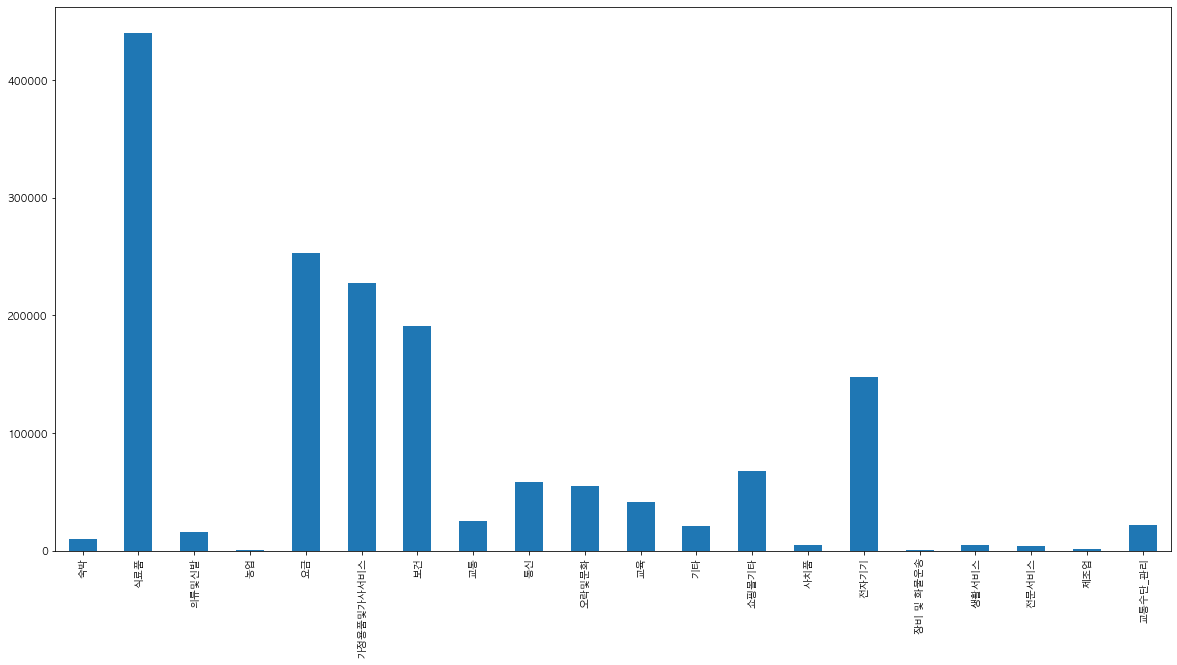

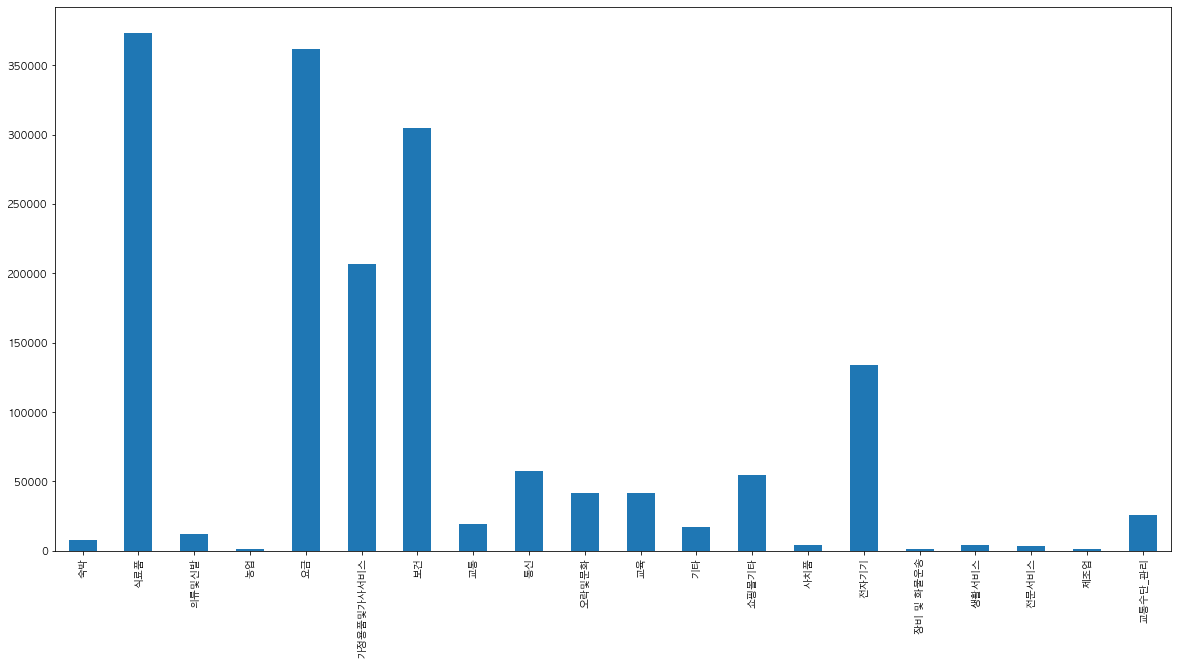

In [50]:
plt.figure(figsize = (20,10))
Abank_mean.plot.bar()


plt.figure(figsize = (20,10))
Bbank_mean.plot.bar()

plt.show()

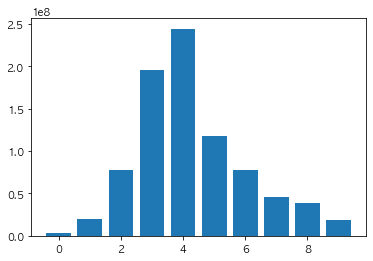

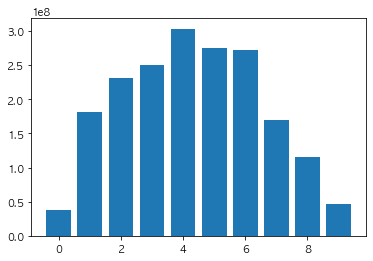

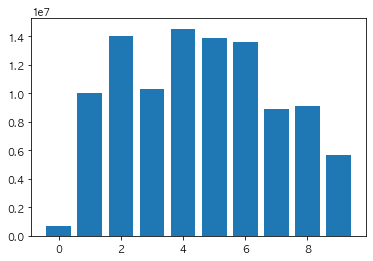

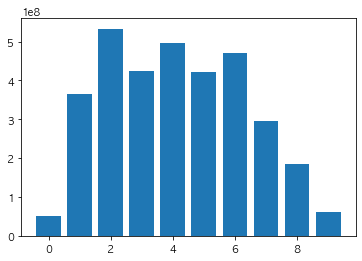

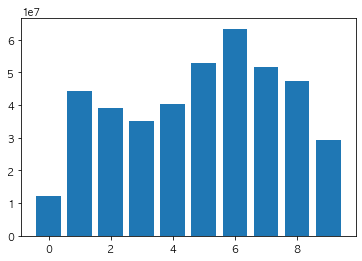

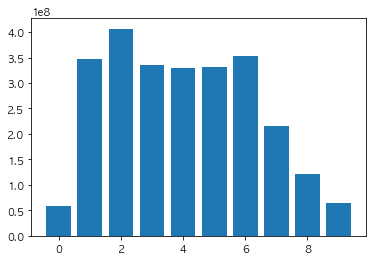

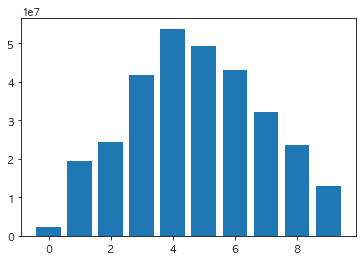

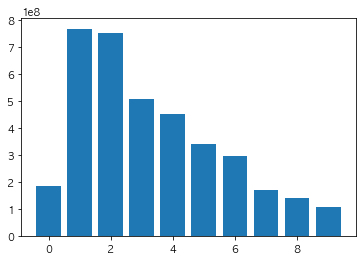

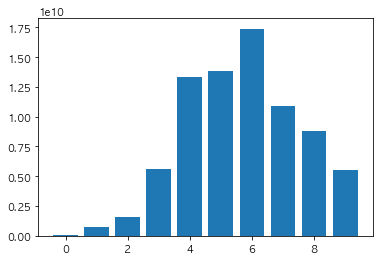

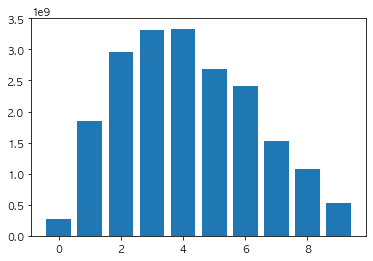

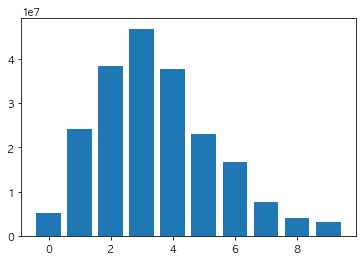

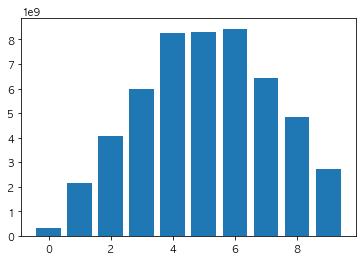

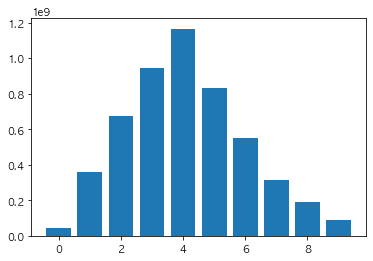

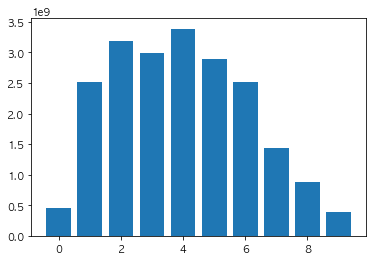

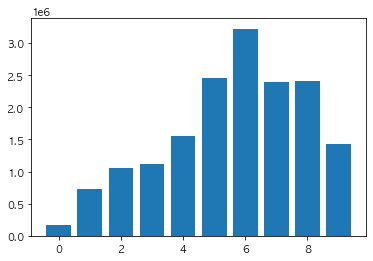

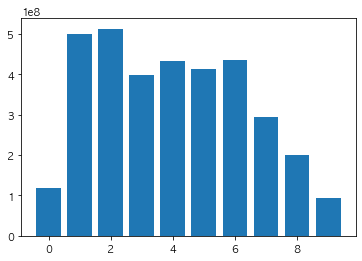

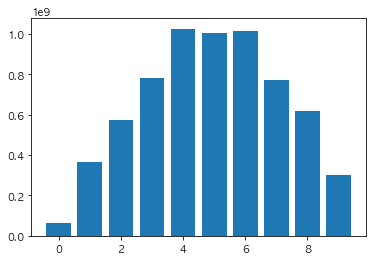

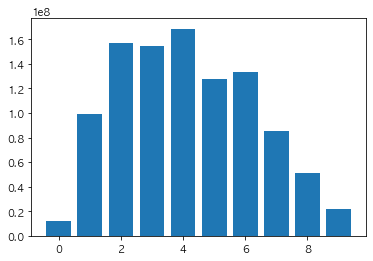

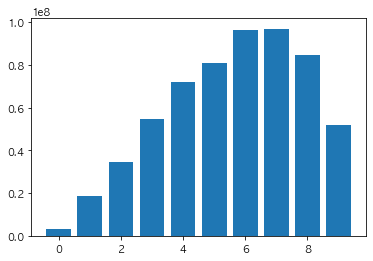

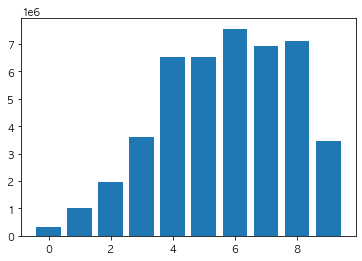

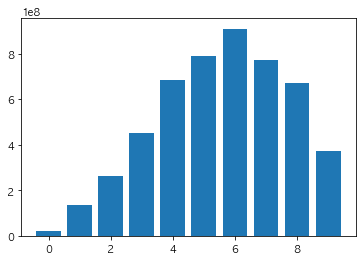

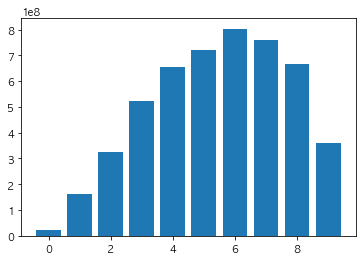

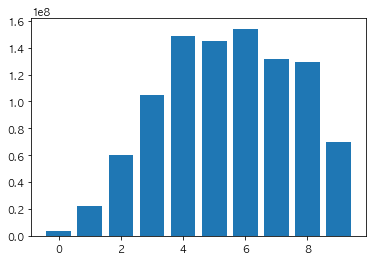

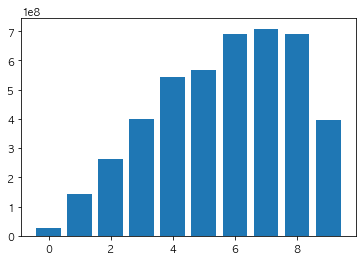

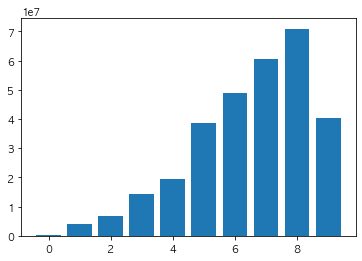

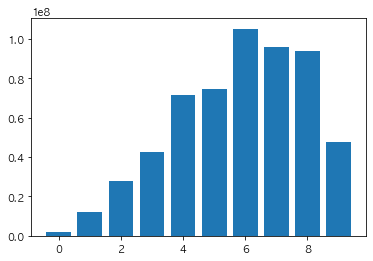

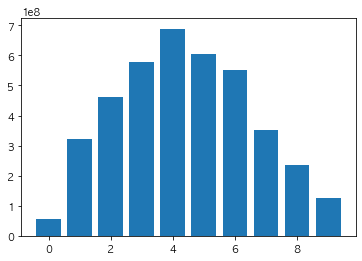

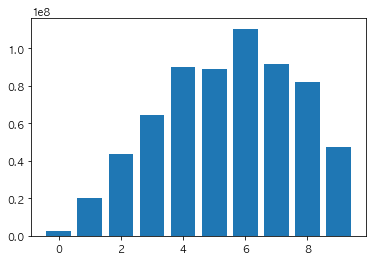

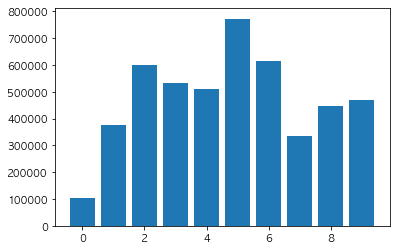

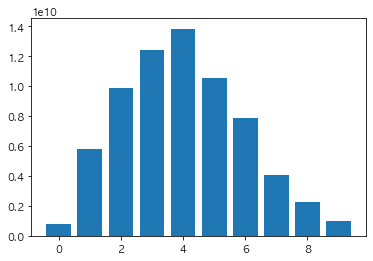

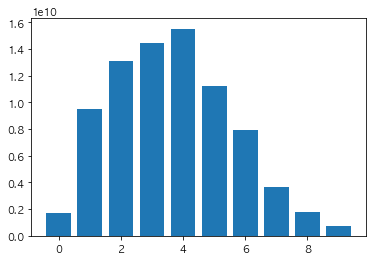

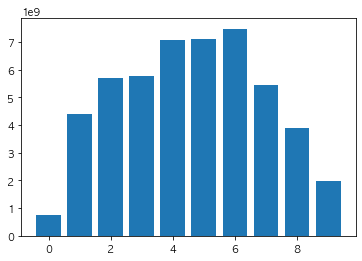

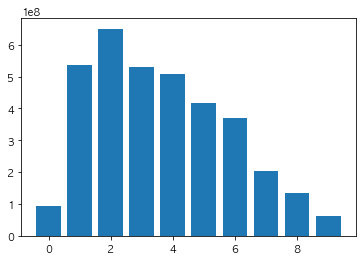

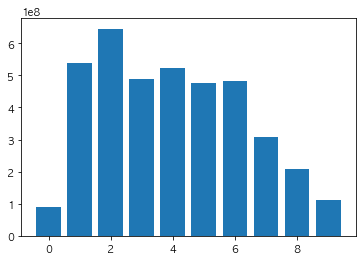

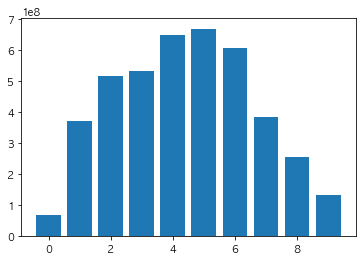

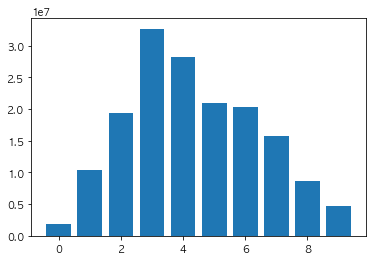

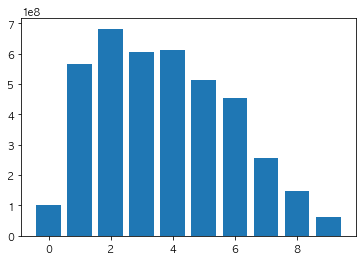

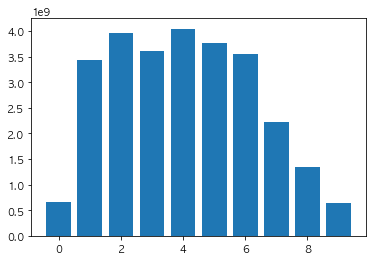

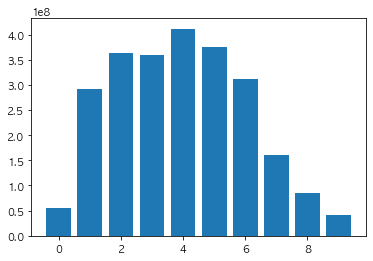

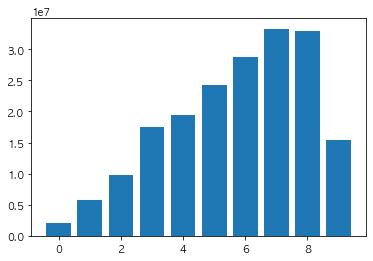

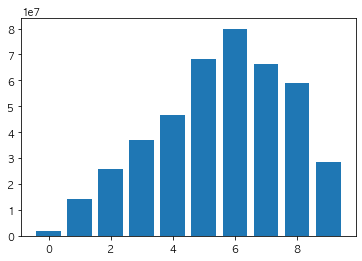

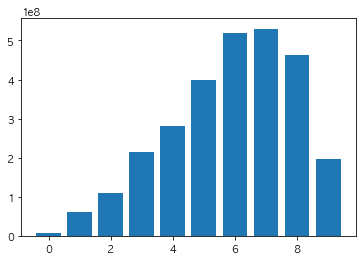

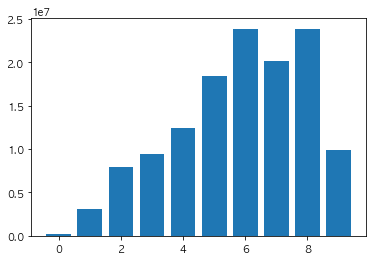

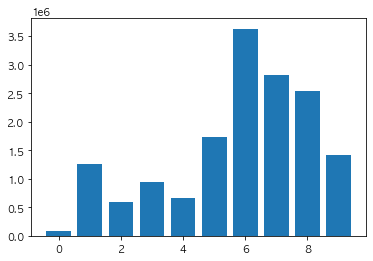

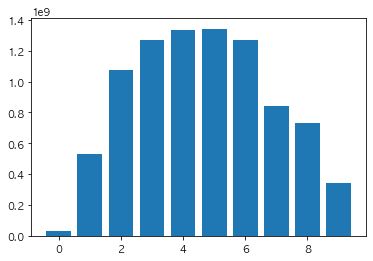

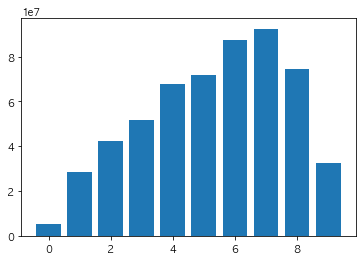

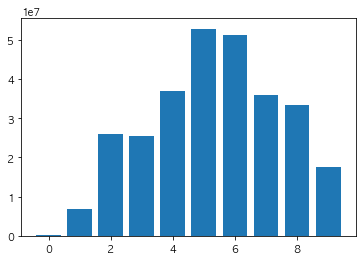

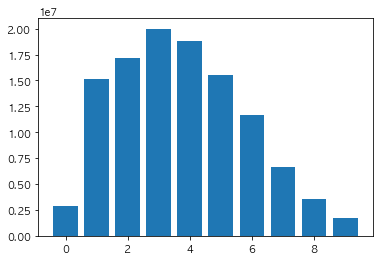

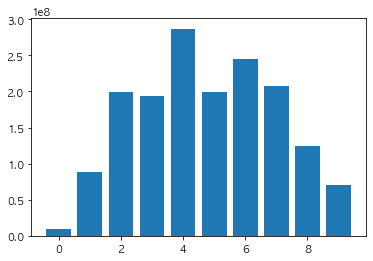

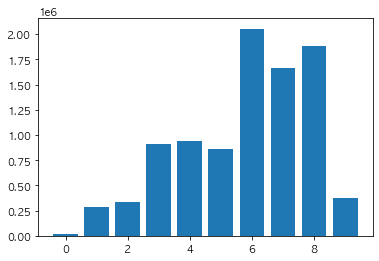

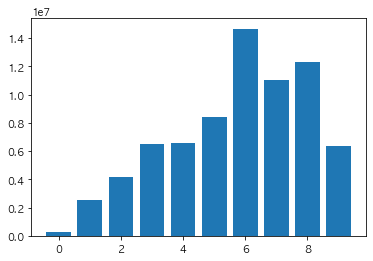

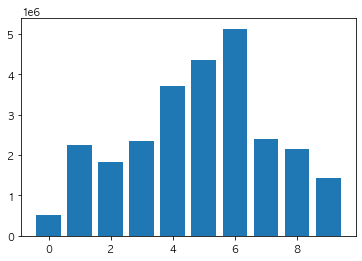

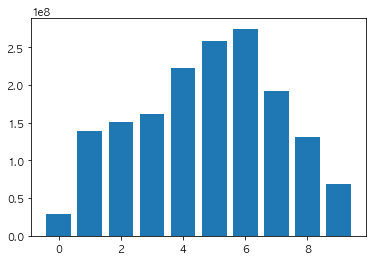

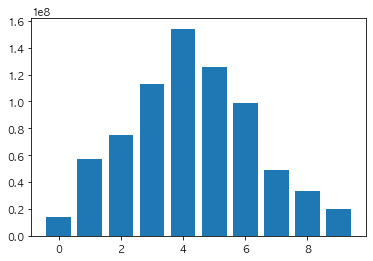

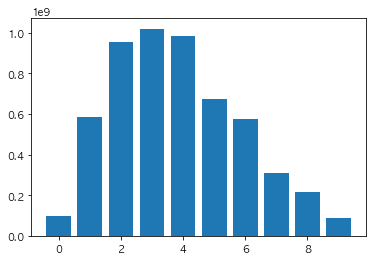

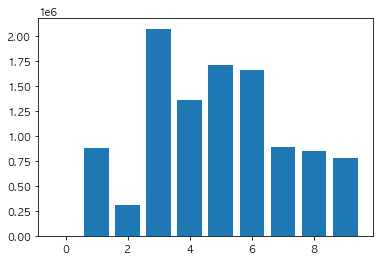

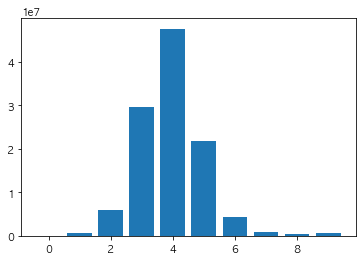

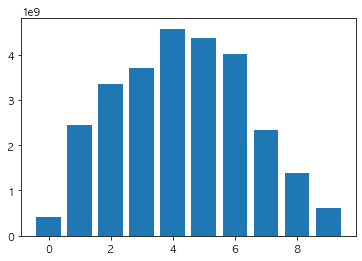

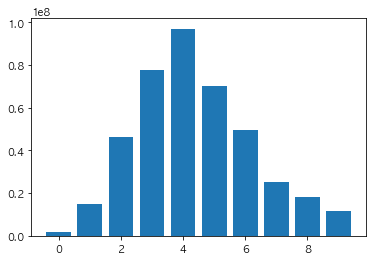

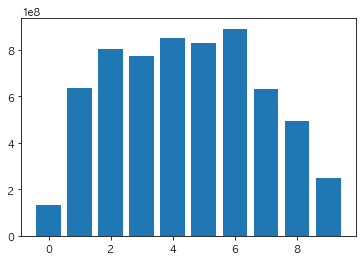

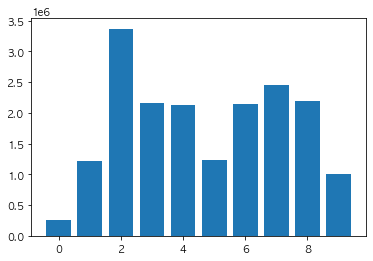

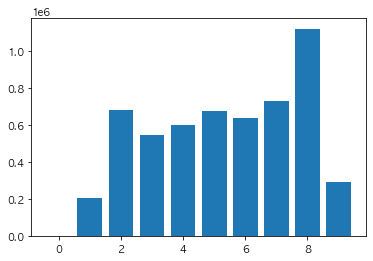

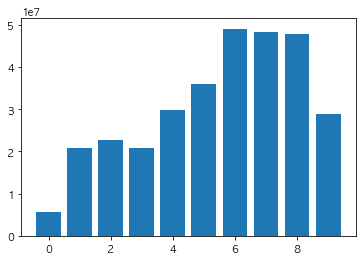

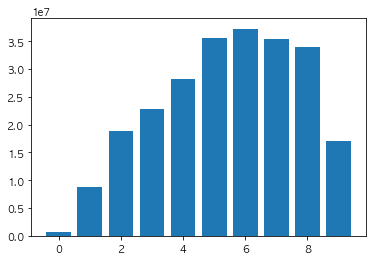

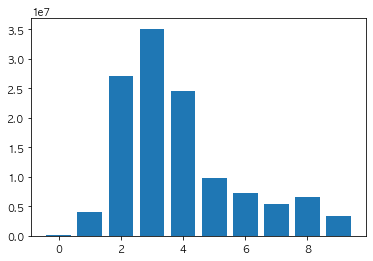

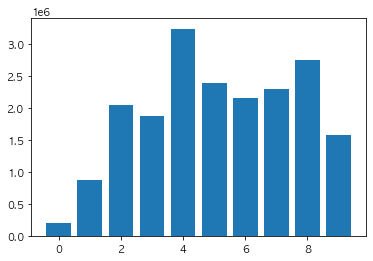

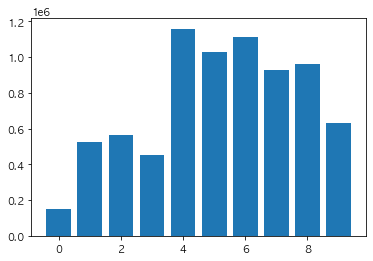

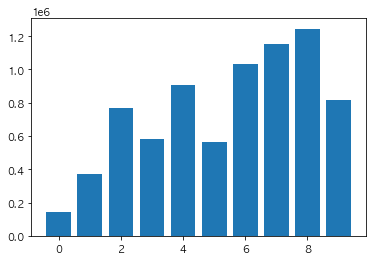

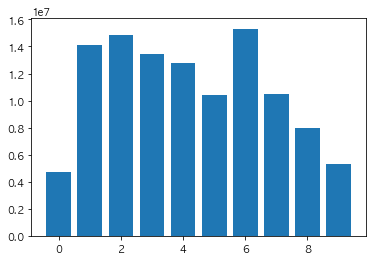

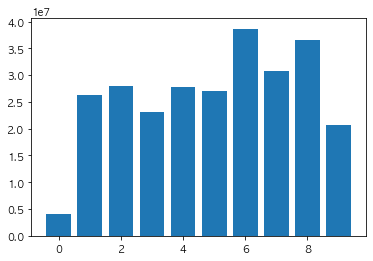

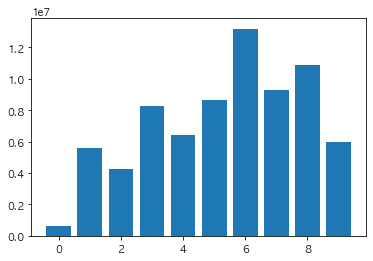

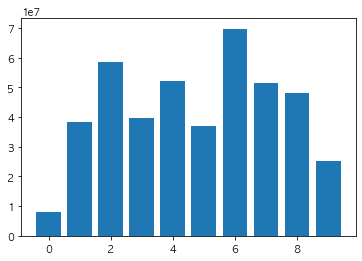

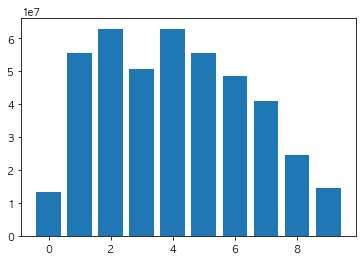

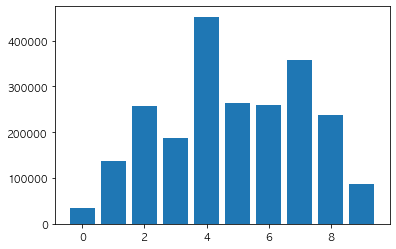

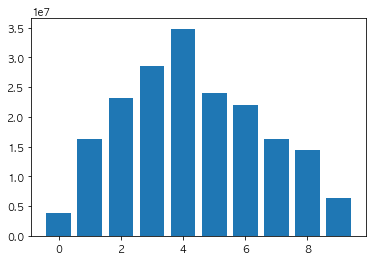

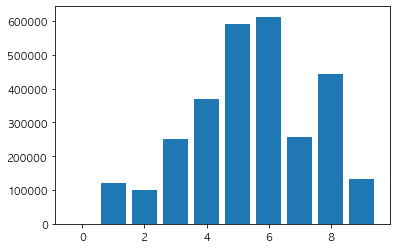

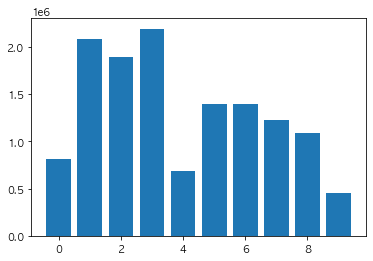

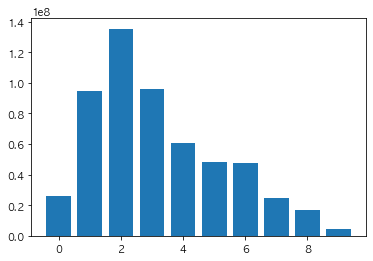

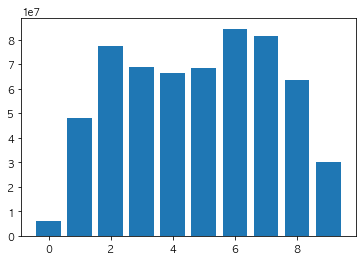

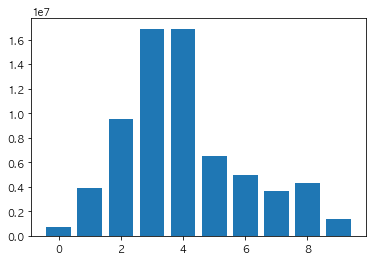

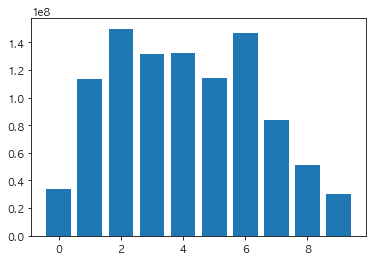

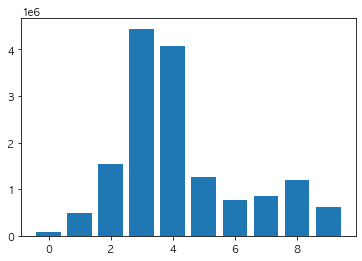

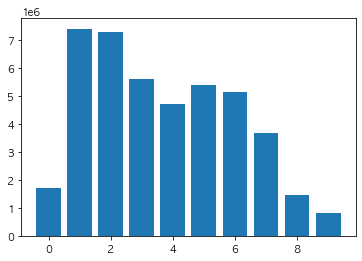

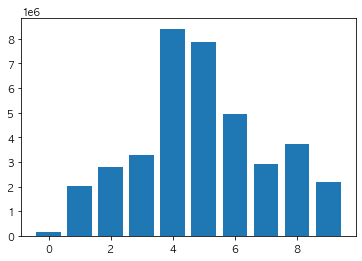

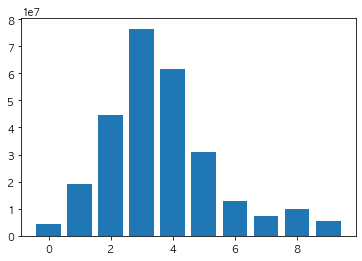

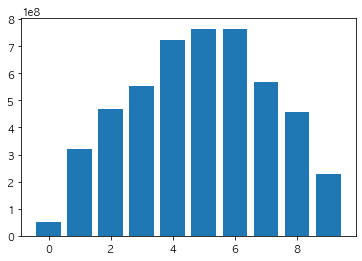

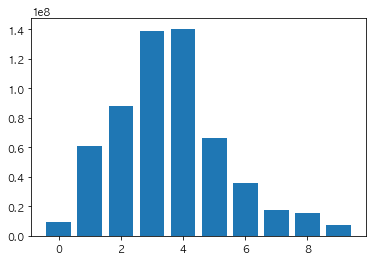

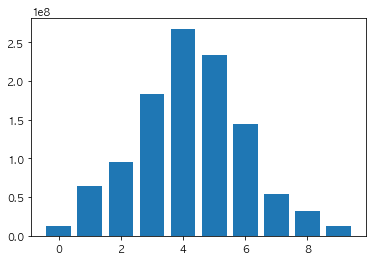

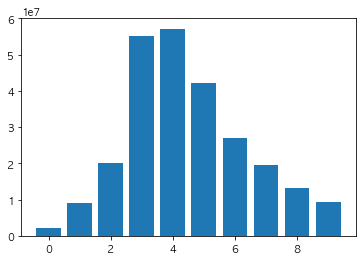

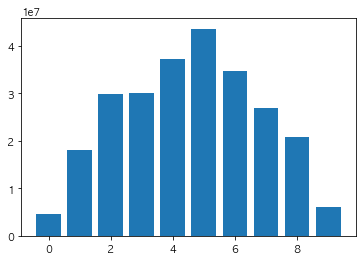

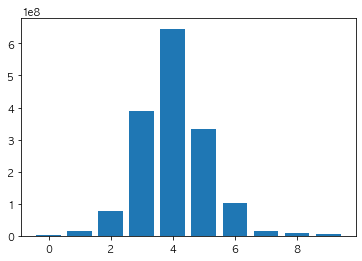

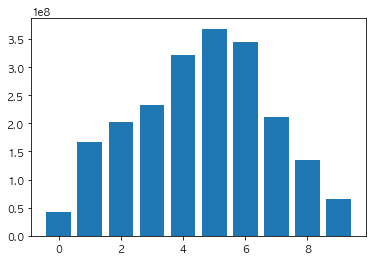

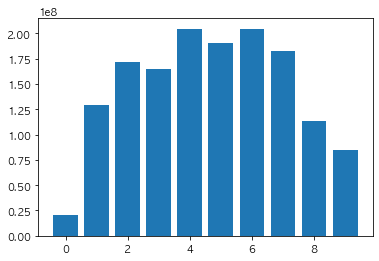

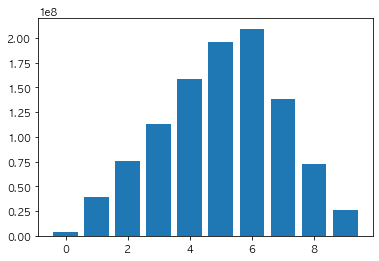

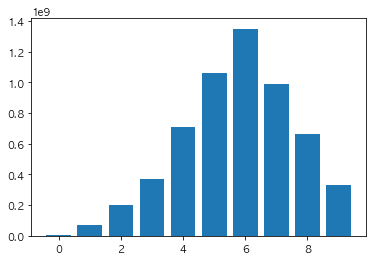

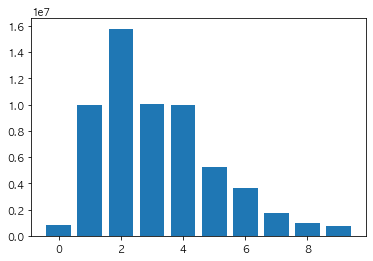

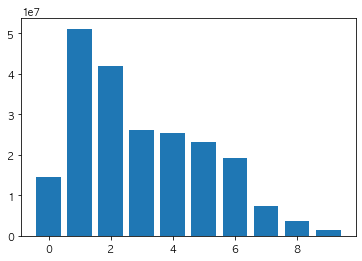

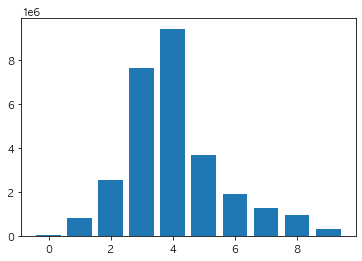

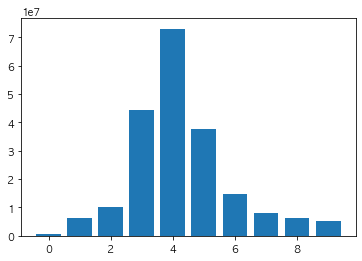

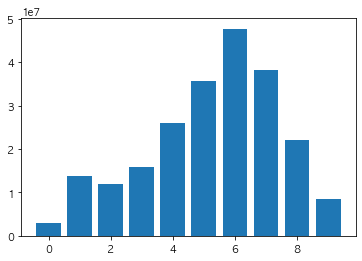

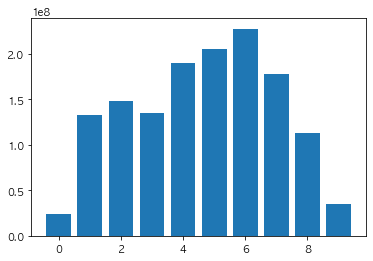

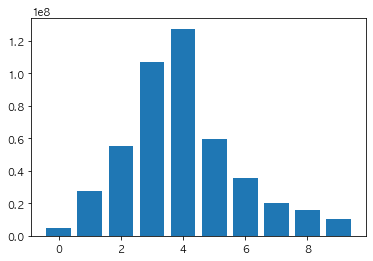

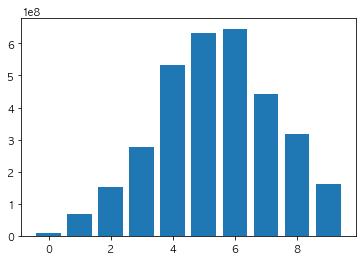

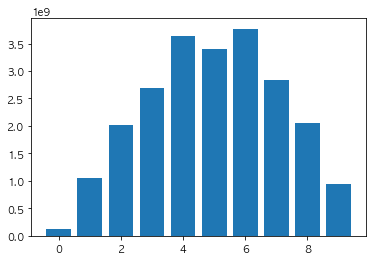

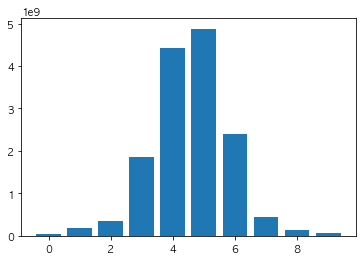

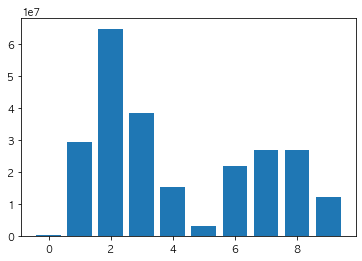

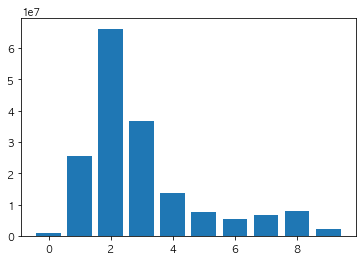

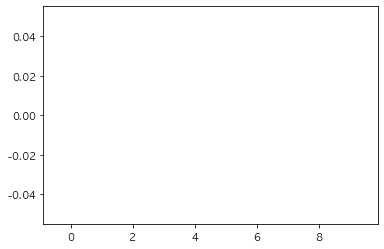

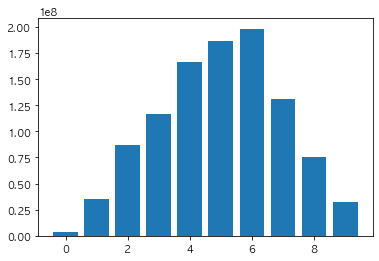

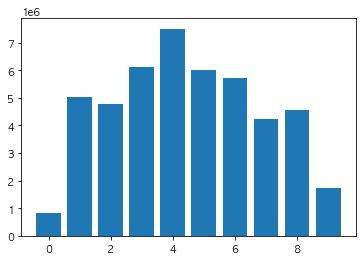

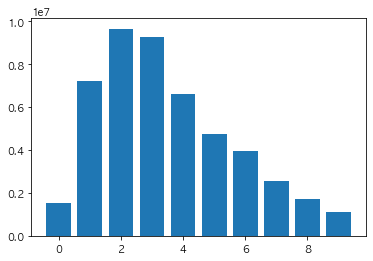

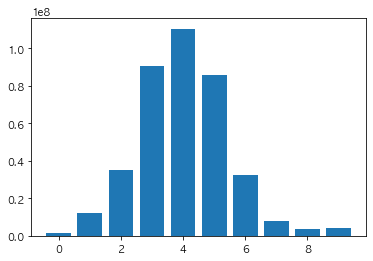

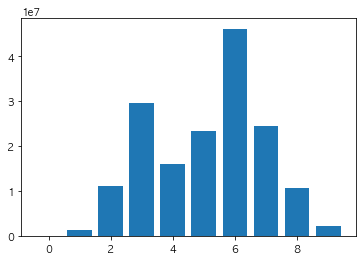

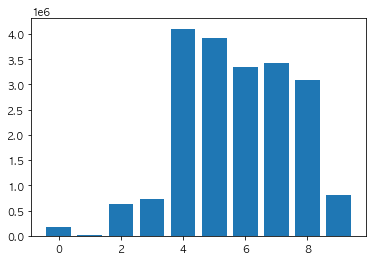

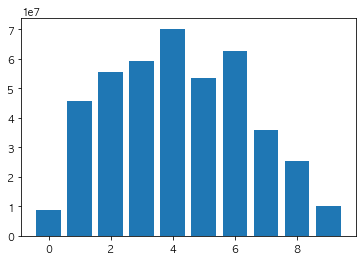

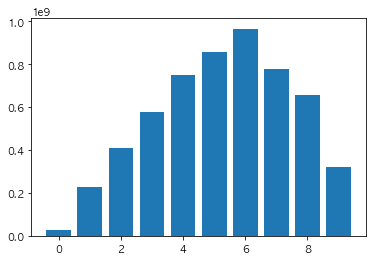

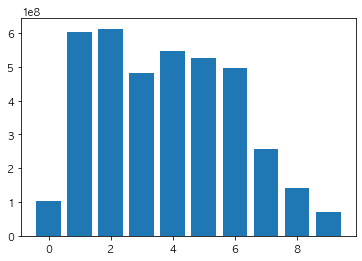

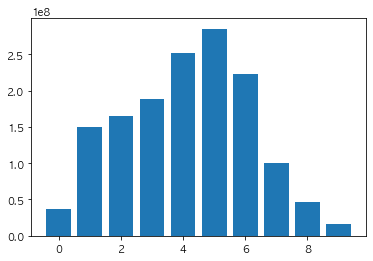

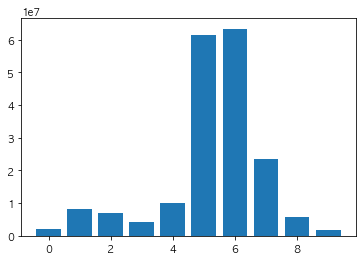

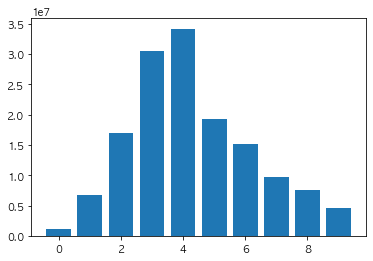

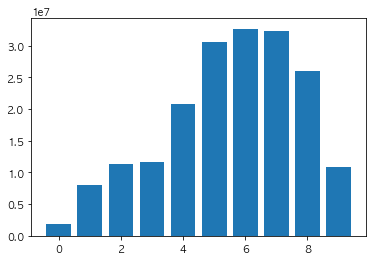

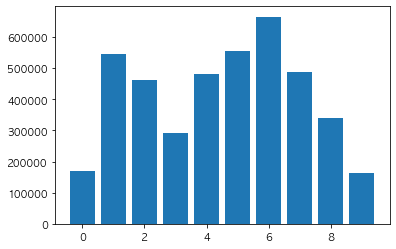

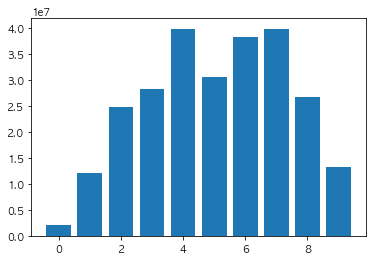

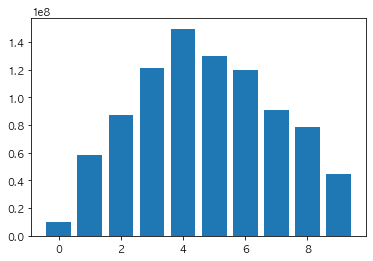

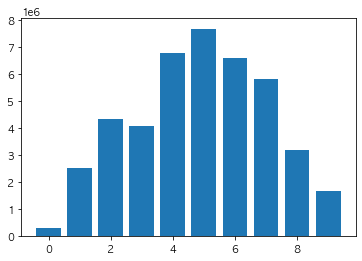

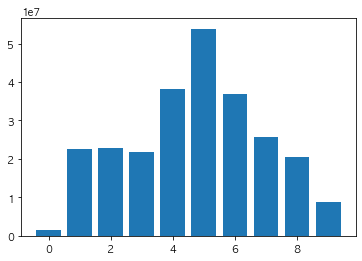

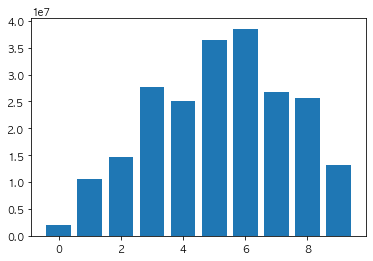

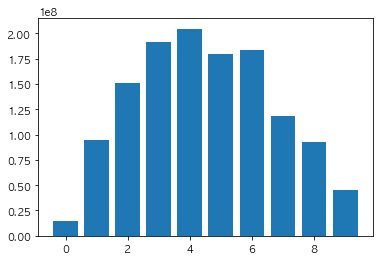

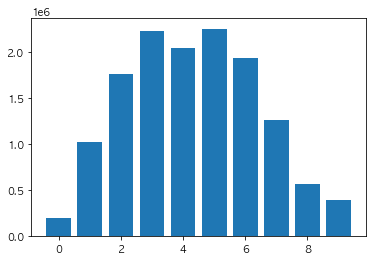

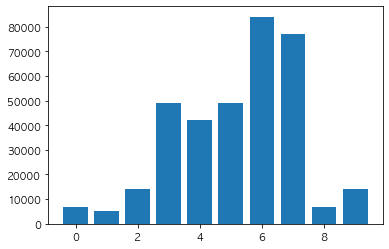

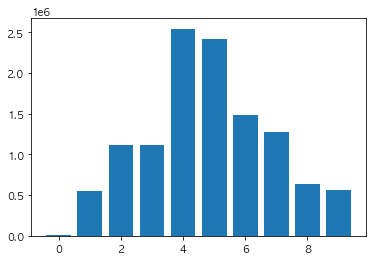

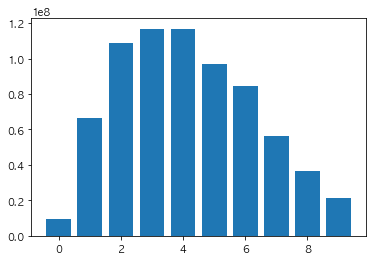

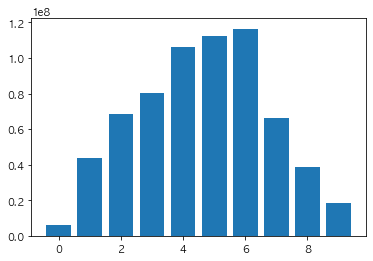

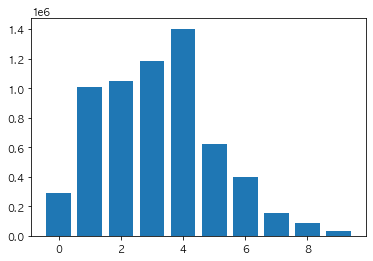

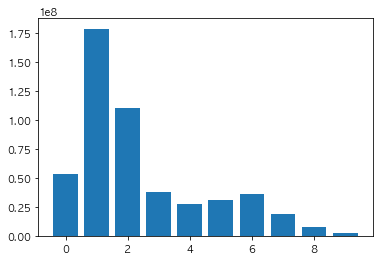

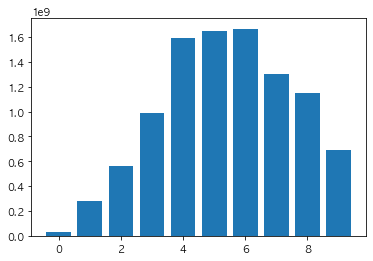

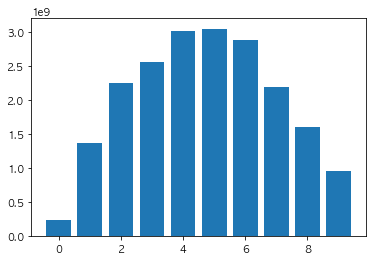

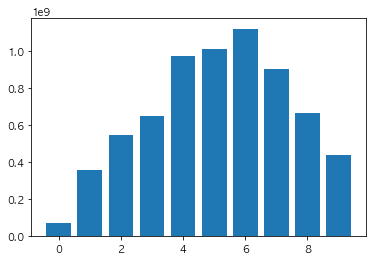

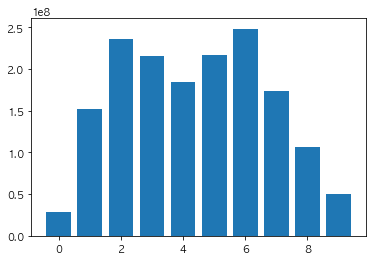

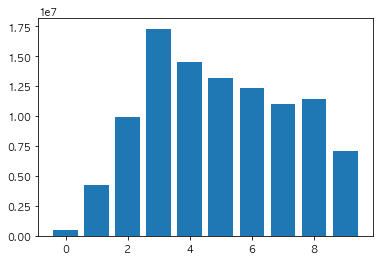

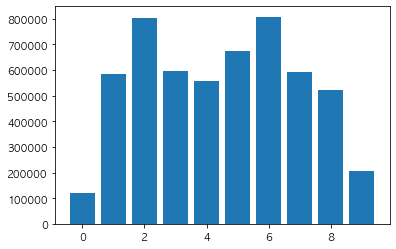

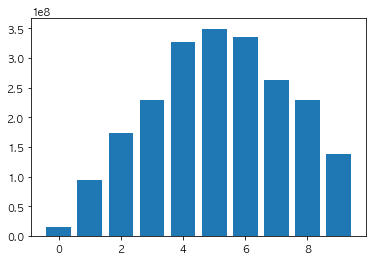

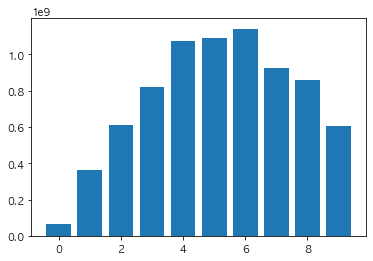

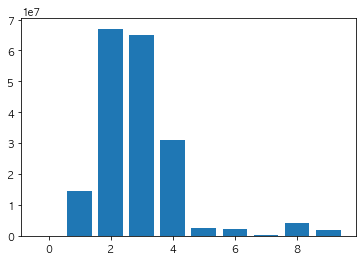

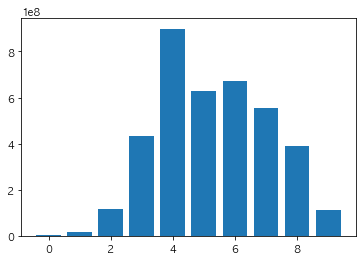

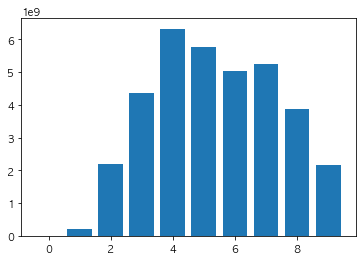

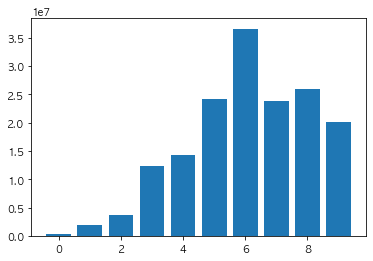

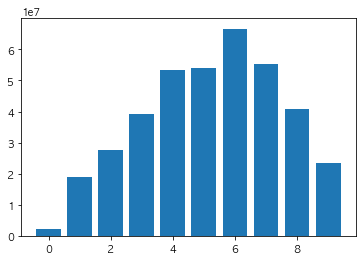

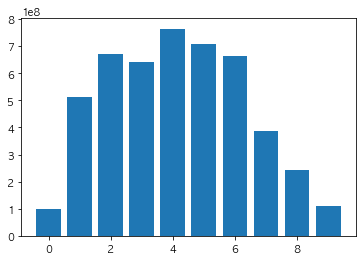

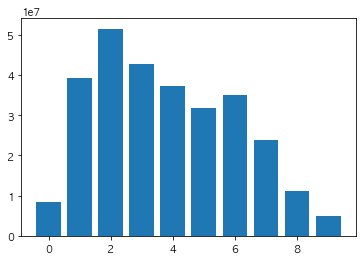

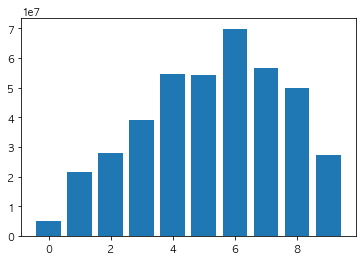

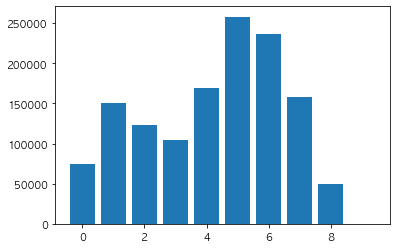

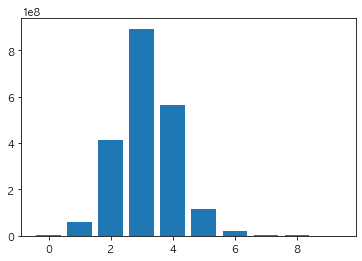

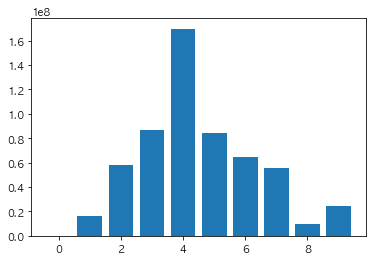

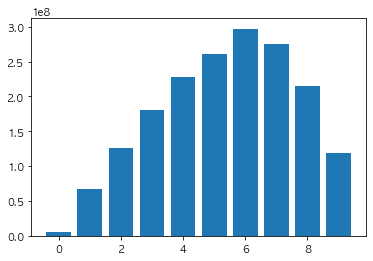

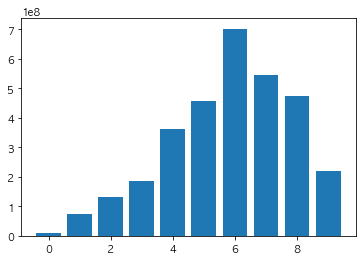

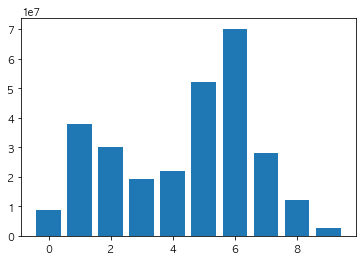

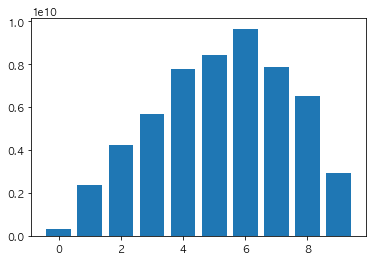

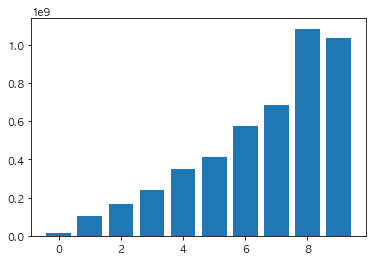

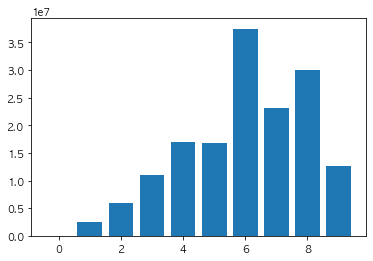

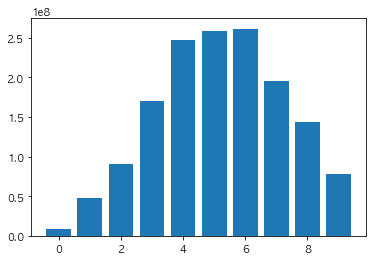

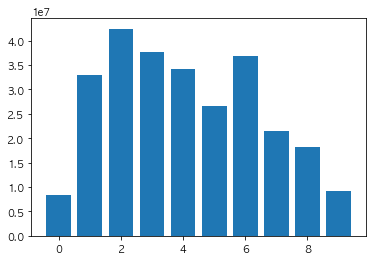

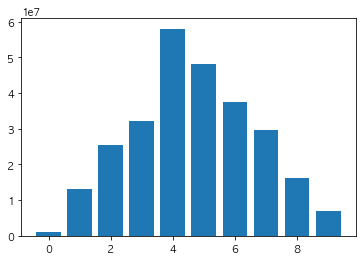

In [351]:
for i in range(7,170):
    a = list(data.groupby(['P2']).sum().iloc[:,i])
    plt.bar(list(range(10)),a)
    plt.show()